# Trabalho 2

## Análise dos dados

Neste notebook está a análise dos dados e a sua preparação inicial.

### Imports

In [2]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import utilidades as ut

### Inicializações e variáveis

In [3]:
warnings.filterwarnings("ignore")  # Desabilitar warnings.
plt.style.use(
    "style/estilo.mplstyle")  # Garantir que se utiliza um estilo definido centralmente e comum a todos os gráficos.
%matplotlib inline

ficheiro = "Dados_Trabalho_TP2.csv"
ficheiro_preparado = "dados_preparados.csv"
colunas_numericas = ["Idade", "FCV", "NRP", "CA", "FAF", "TUDE", "IMC"]
colunas_classes = ["Genero", "Historico_obesidade_familiar", "FCCAC", "Fumador", "MCC", "CCER", "CBA", "TRANS"]


## 4.1.1 Leitura de dados

Na análise ao **dataset** verifica-se que a primeira coluna, identificada como "Unnamed" tem o indíce de cada registo de dados, algo que nos é fornecido pelo **pandas**, e portanto podemos eliminar esta coluna. 
Esta operação estaria incluída nas tarefas do ponto *4.1.4*, mas realizar neste ponto facilita a criação dos gráficos no próximo ponto.

In [4]:
dados_lidos = pd.read_csv(ficheiro)
dados_analise = dados_lidos.drop(columns=dados_lidos.columns[0], axis=1)

### Dimensão dos dados (lidos)

Os dados lidos incluem 1 coluna com o valor dos indices das linhas, que é removida de imediato.

In [5]:
nr_linhas, nr_colunas = dados_lidos.shape
ut.titulo("Dimensão dos dados")
ut.etiqueta_e_valor("Número de linhas:", nr_linhas)
ut.etiqueta_e_valor("Número de colunas:", nr_colunas)

Dimensão dos dados
Número de linhas:: 2111
Número de colunas:: 18


### Análise do dataset

#### Atributos

Descrição dos atributos, segundo a documentação. 

| Sigla | Descrição                                                         |
|-------|-------------------------------------------------------------------|
| FCCAC | Frequência de Consumo de Comida Altamente Calórica                | 
| FCV   | Frequência de Consumo de Vegetais                                 | 
| NRP   | Número de Refeições Principais                                    |
| CCER  | Consumo de Comida Entre Refeições                                 |
| CA    | Consumo de Água                                                   |
| CBA   | Consumo de Bebidas Alcoólicas                                     |
| MCC   | Monitorização do Consumo Calorias Histórico de Obesidade Familiar | 

### Informação sobre o dataset

A função ``info()`` apresenta a informação das colunas (atríbutos): Index da coluna, nome (se tiver, quantidade de registos *não nulos* e o tipo de dados de cada um deles.

In [6]:
dados_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Genero                        2111 non-null   object 
 1   Idade                         2111 non-null   float64
 2   Altura                        2111 non-null   float64
 3   Peso                          2111 non-null   float64
 4   Historico_obesidade_familiar  2111 non-null   object 
 5   FCCAC                         2111 non-null   object 
 6   FCV                           2111 non-null   float64
 7   NRP                           2111 non-null   float64
 8   CCER                          2111 non-null   object 
 9   Fumador                       2111 non-null   object 
 10  CA                            2111 non-null   float64
 11  MCC                           2111 non-null   object 
 12  FAF                           2111 non-null   float64
 13  TUD

### Amostra do dataset

Para uma rápida visualização dos dados, temos as funções ``head(n)`` e ``tail(n)`` que nos dão *n* linhas, por defeito **5**, respetivamente do início ou fim do **dataset**.

In [7]:
dados_analise.head()

,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label
0,Feminino,21.0,1.62,64.0,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.0,Nao,0.0,1.0,Nao,Transportes_Publicos,Peso_Normal
1,Feminino,21.0,1.52,56.0,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.0,Sim,3.0,0.0,Ocasionalmente,Transportes_Publicos,Peso_Normal
2,Masculino,23.0,1.80,77.0,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.0,Nao,2.0,1.0,Frequentemente,Transportes_Publicos,Peso_Normal
3,Masculino,27.0,1.80,87.0,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.0,Nao,2.0,0.0,Frequentemente,Caminhada,Excesso_Peso_Grau_I
4,Masculino,22.0,1.78,89.8,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.0,Nao,0.0,0.0,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II


In [8]:
dados_analise.tail()

,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label
2106,Feminino,20.976842,1.710730,131.408528,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,1.728139,Nao,1.676269,0.906247,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida
2107,Feminino,21.982942,1.748584,133.742943,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.005130,Nao,1.341390,0.599270,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida
2108,Feminino,22.524036,1.752206,133.689352,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.054193,Nao,1.414209,0.646288,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida
2109,Feminino,24.361936,1.739450,133.346641,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.852339,Nao,1.139107,0.586035,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida
2110,Feminino,23.664709,1.738836,133.472641,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.863513,Nao,1.026452,0.714137,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida


#### Descrição do dados do dateset

A função ``describe()`` analisa os dados do **dataset** e retorna um conjunto de estatísticas descritivas.

In [9]:
dados_analise.describe(include="all")

,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,9
top,Masculino,NaN,NaN,NaN,Sim,Sim,NaN,NaN,Ocasionalmente,Nao,NaN,Nao,NaN,NaN,Ocasionalmente,Transportes_Publicos,Obesidade_Moderada
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,370
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


### Identificar as classes dos atributos

Os atributos numéricos serão trabalhados mais adiante, quando fizermos a sua **normalização**. Para já vamos verificar as classes existentes para decidir qual a melhor estratégia para os preparar para a utilização nos vários métodos que vamos utilizar.

Começamos por ver a quantidade de valores únicos em cada classe, para mais fácilmente distinguir aquelas que serão potencialmente valores "continuos" e as que serão "classes".

In [24]:
dados_analise.nunique()

Genero                             2
Idade                           1402
Historico_obesidade_familiar       2
FCCAC                              2
FCV                              810
NRP                              635
CCER                               4
Fumador                            2
CA                              1268
MCC                                2
FAF                             1190
TUDE                            1129
CBA                                4
TRANS                              5
Label                              9
IMC                             1968
dtype: int64

E podemos ver os "descritivos" dos que são classes.

In [10]:
for classe in colunas_classes:
    ut.tabela_1_coluna(dados_analise[classe].unique(), f"Classes da coluna \033[1m{classe}\033[0m")
    print("")  # Deixar uma linha em branco no final. 

Classes da coluna Genero
Feminino
Masculino

Classes da coluna Historico_obesidade_familiar
Sim
Nao

Classes da coluna FCCAC
Nao
Sim

Classes da coluna Fumador
Nao
Sim

Classes da coluna MCC
Nao
Sim

Classes da coluna CCER
Ocasionalmente
Frequentemente
Sempre
Não

Classes da coluna CBA
Nao
Ocasionalmente
Frequentemente
Sempre

Classes da coluna TRANS
Transportes_Publicos
Caminhada
Automovel
Mota
Bicicleta



## 4.1.2

### Derivar atributo (IMC)

Depois de criar o novo atributo, podemos usar qualquer uma das funções que foram utilizadas para analisar o **dataset**, neste caso tratando-se de valores numéricos consideramos que a que a mais útil é a ``describe()``.

Podemos também remover as colunas utilizadas para este cálculo uma vez que não vão ser necessárias.

Faz sentido alguma limpeza do **Dataset** neste momento, pois vai facilitar o nosso trabalho.

In [11]:
dados_analise['IMC'] = dados_analise['Peso'] / (dados_analise['Altura'] * dados_analise['Altura'])
dados_analise.drop(columns=['Peso', 'Altura'], inplace=True)

Ao criar uma nova coluna baseada nos valores de outras 2, vamos remover as de base, para evitar a colinearidade.

### Rever o **dataset** após as alterações

In [12]:
dados_analise.describe(include="all")

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
count,2111,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111,2111.000000
unique,2,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,9,NaN
top,Masculino,NaN,Sim,Sim,NaN,NaN,Ocasionalmente,Nao,NaN,Nao,NaN,NaN,Ocasionalmente,Transportes_Publicos,Obesidade_Moderada,NaN
freq,1068,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,370,NaN
mean,NaN,24.312600,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN,29.700159
std,NaN,6.345968,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN,8.011337
min,NaN,14.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,12.998685
25%,NaN,19.947192,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN,24.325802
50%,NaN,22.777890,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN,28.719089
75%,NaN,26.000000,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN,36.016501


Finalmente, usamos novamente a função ``info()`` para confirmar as *series* com que vamos trabalhar de seguida. 

In [13]:
dados_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Genero                        2111 non-null   object 
 1   Idade                         2111 non-null   float64
 2   Historico_obesidade_familiar  2111 non-null   object 
 3   FCCAC                         2111 non-null   object 
 4   FCV                           2111 non-null   float64
 5   NRP                           2111 non-null   float64
 6   CCER                          2111 non-null   object 
 7   Fumador                       2111 non-null   object 
 8   CA                            2111 non-null   float64
 9   MCC                           2111 non-null   object 
 10  FAF                           2111 non-null   float64
 11  TUDE                          2111 non-null   float64
 12  CBA                           2111 non-null   object 
 13  TRA

 ## 4.1.3 Analisar os atributos do conjunto de dados mais significativos, usando gráficos, ...

### Histogramas

Com estes gráficos podemos ver a distribuição dos valores por "segmentos" de valores.

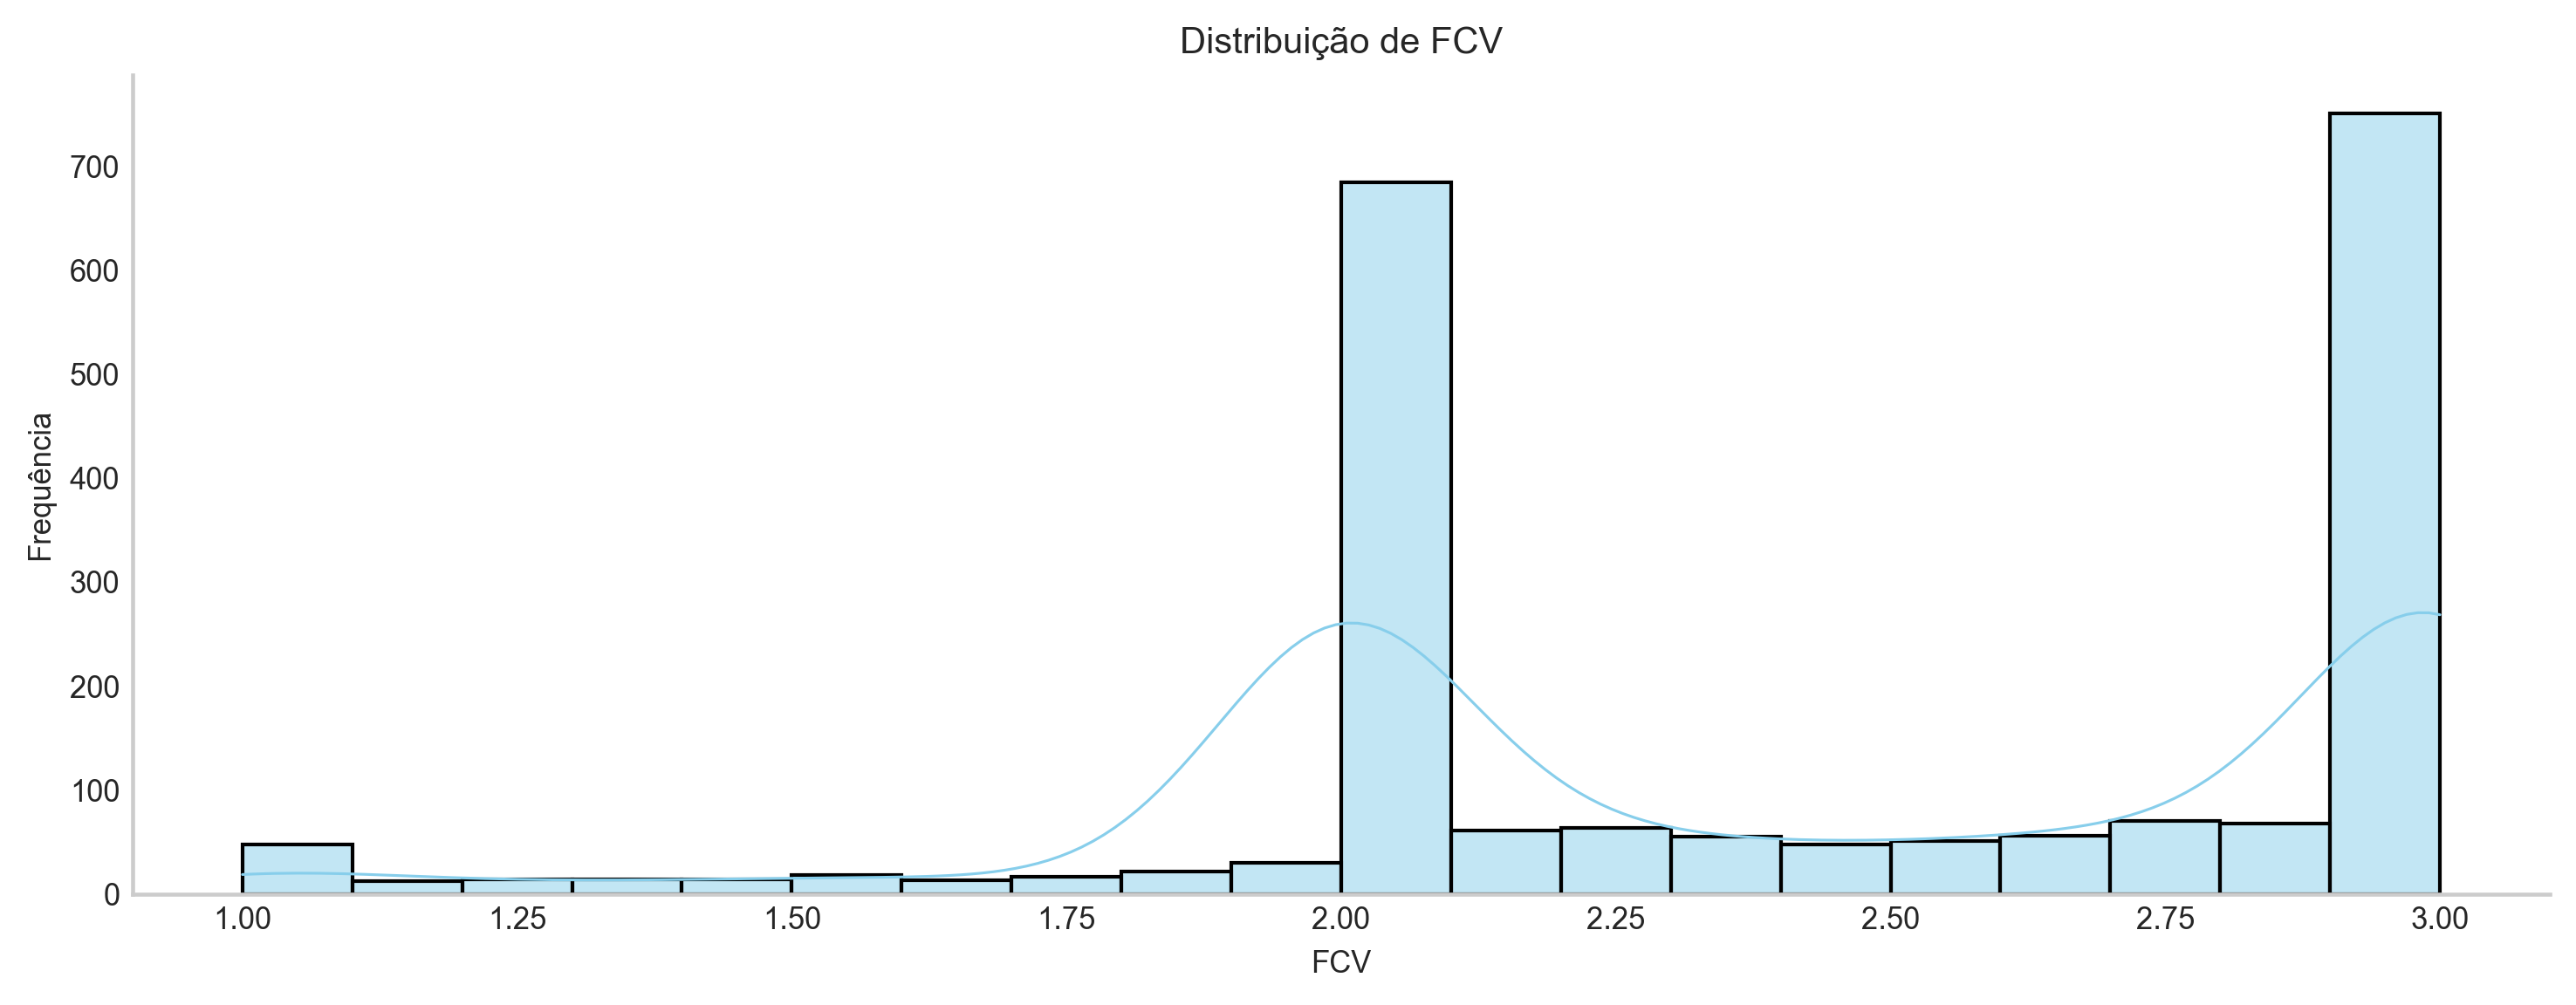

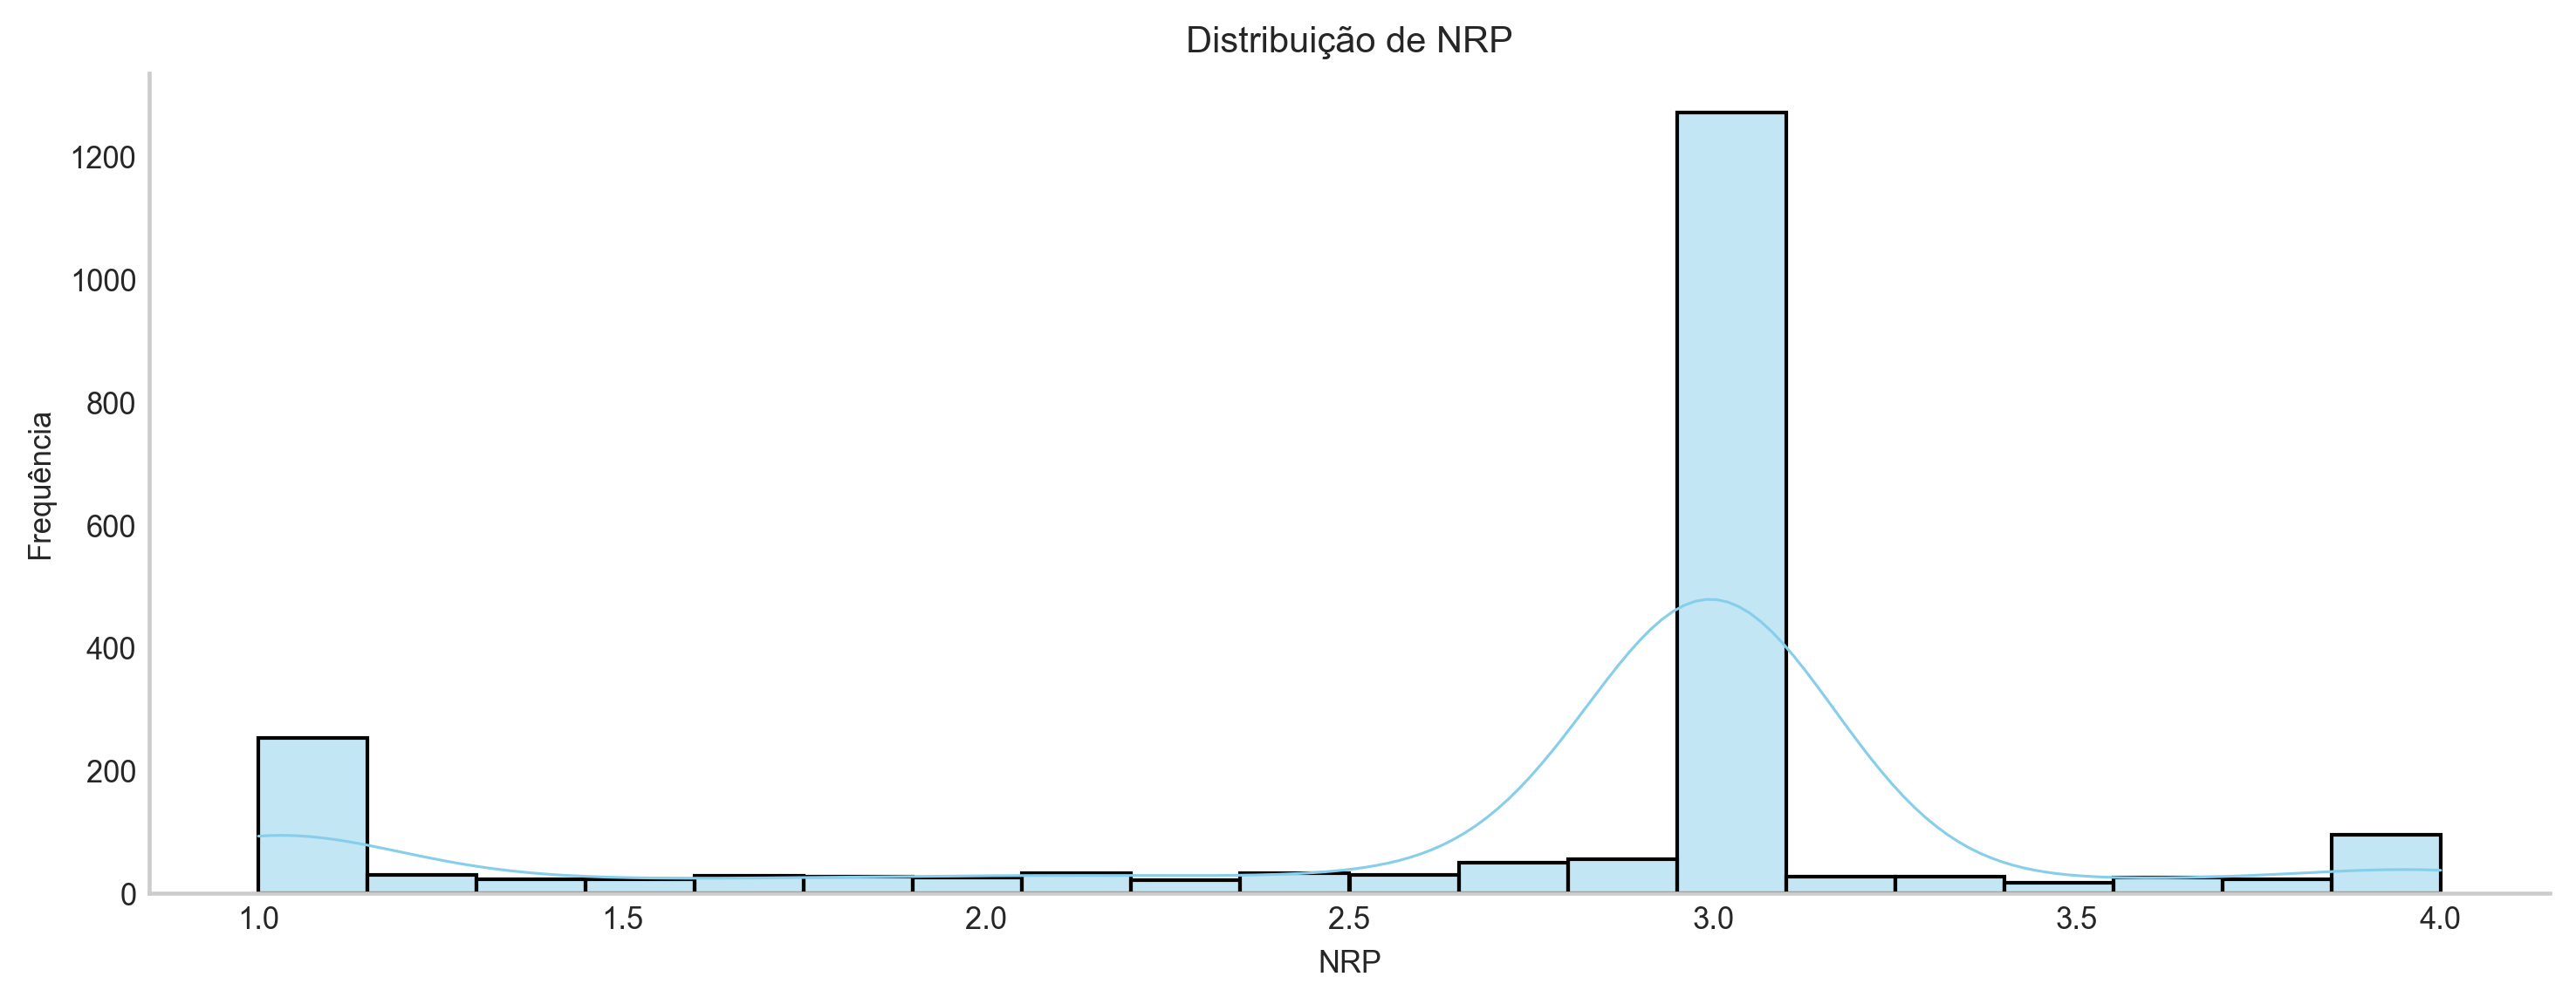

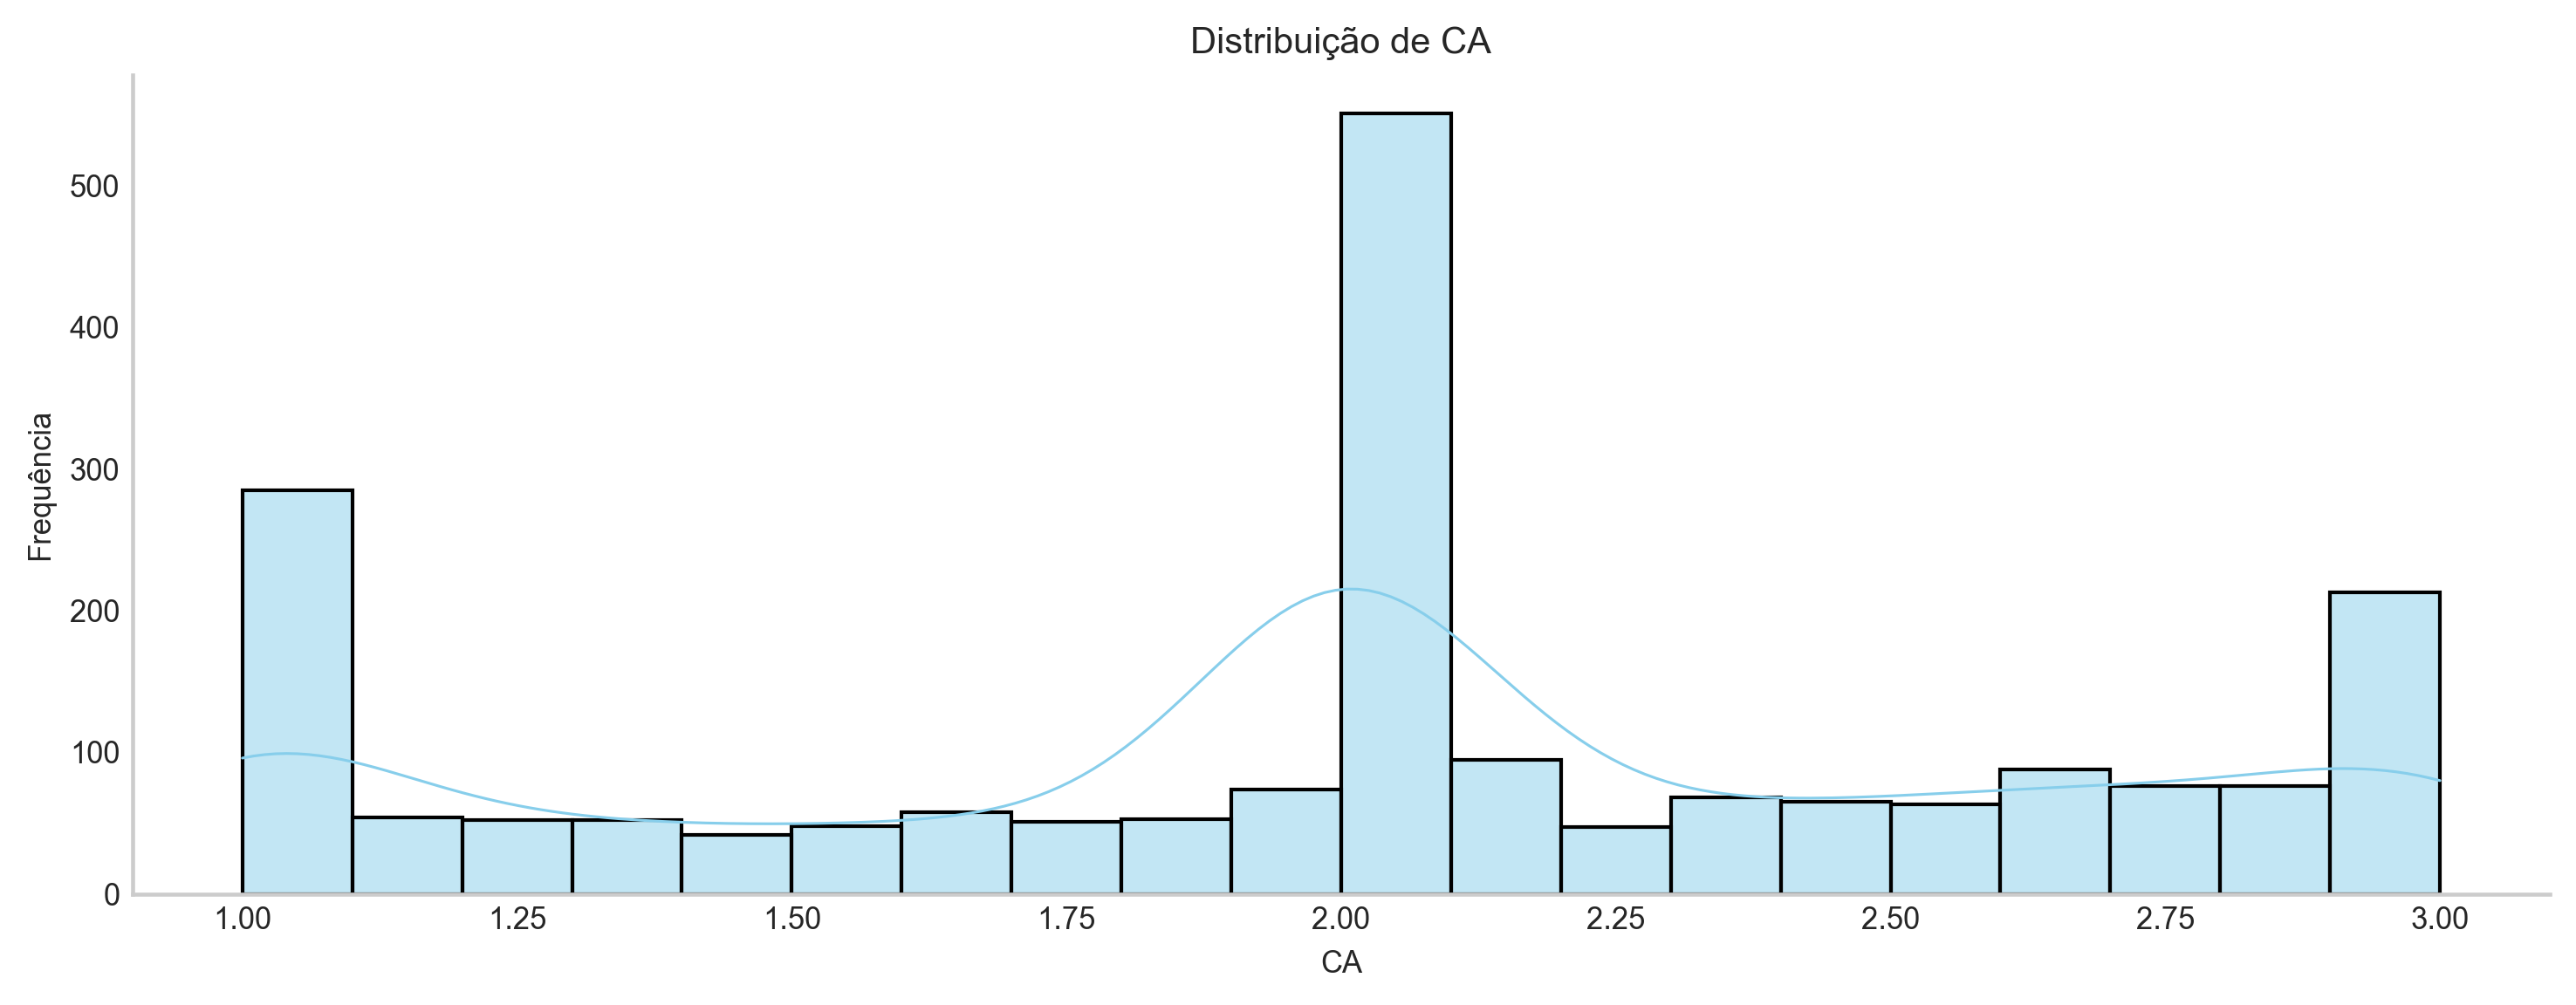

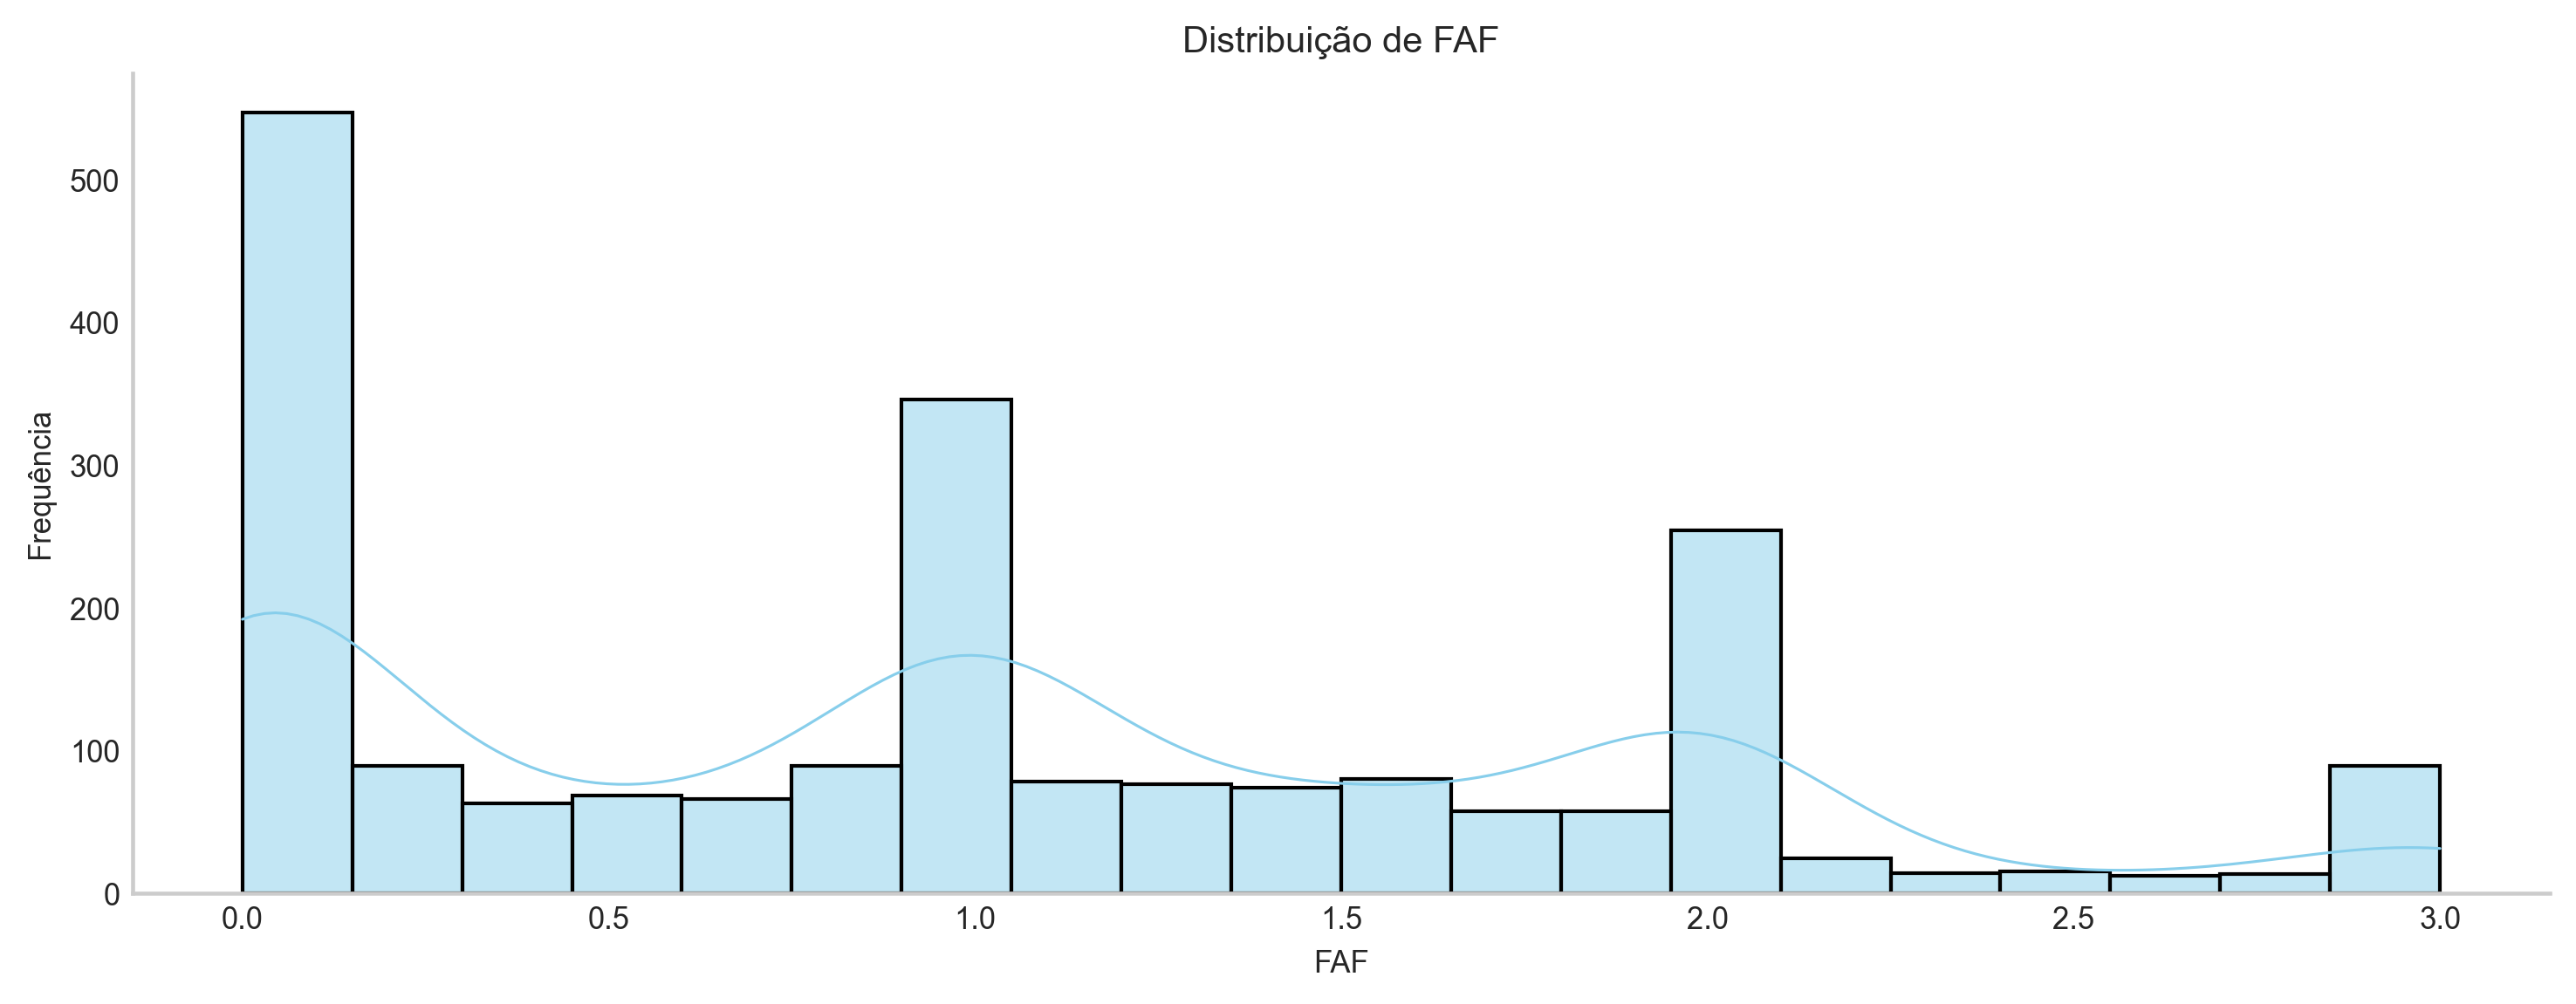

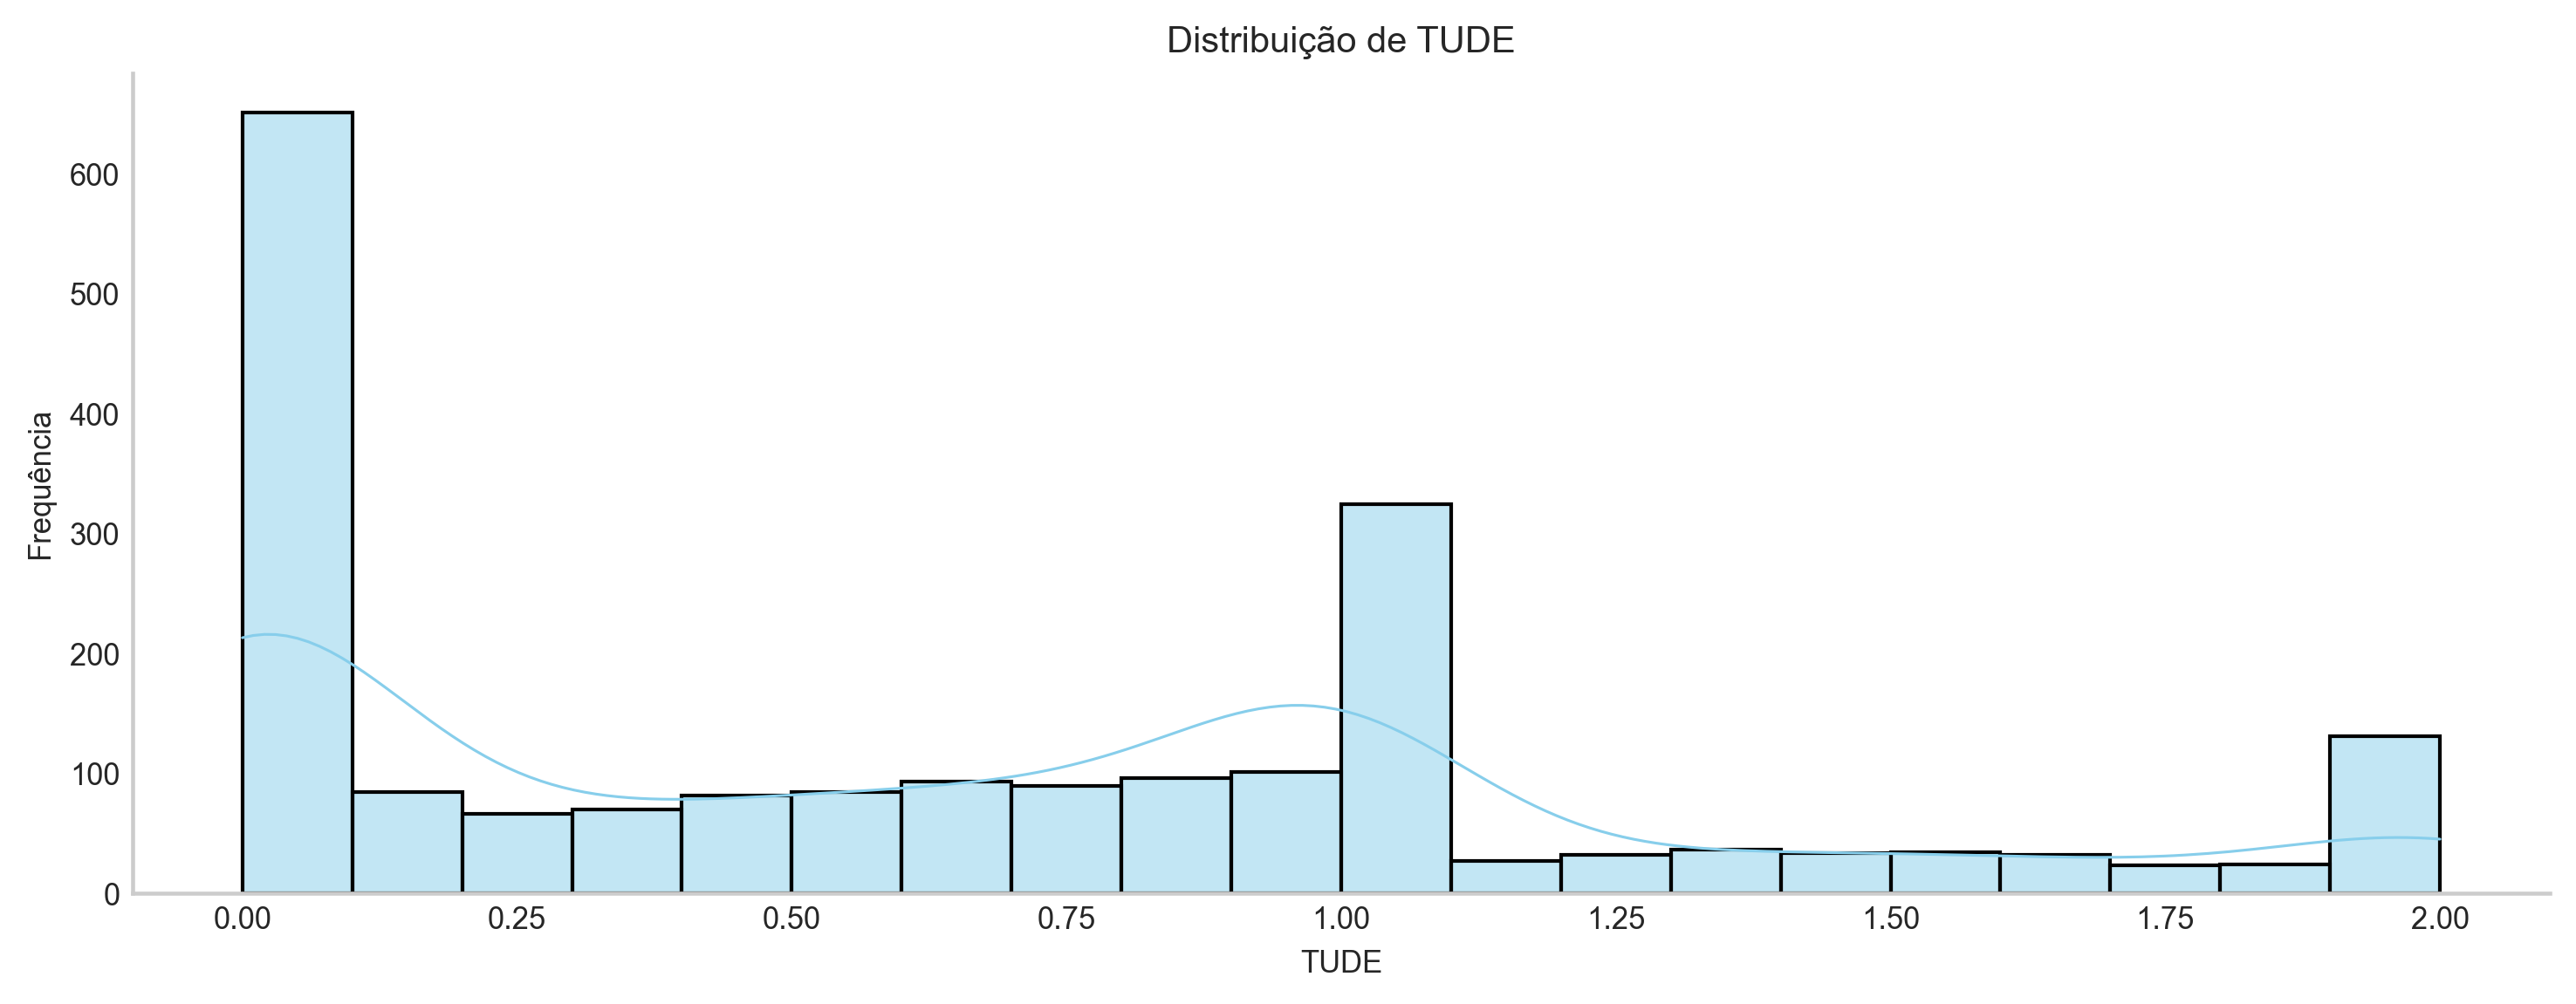

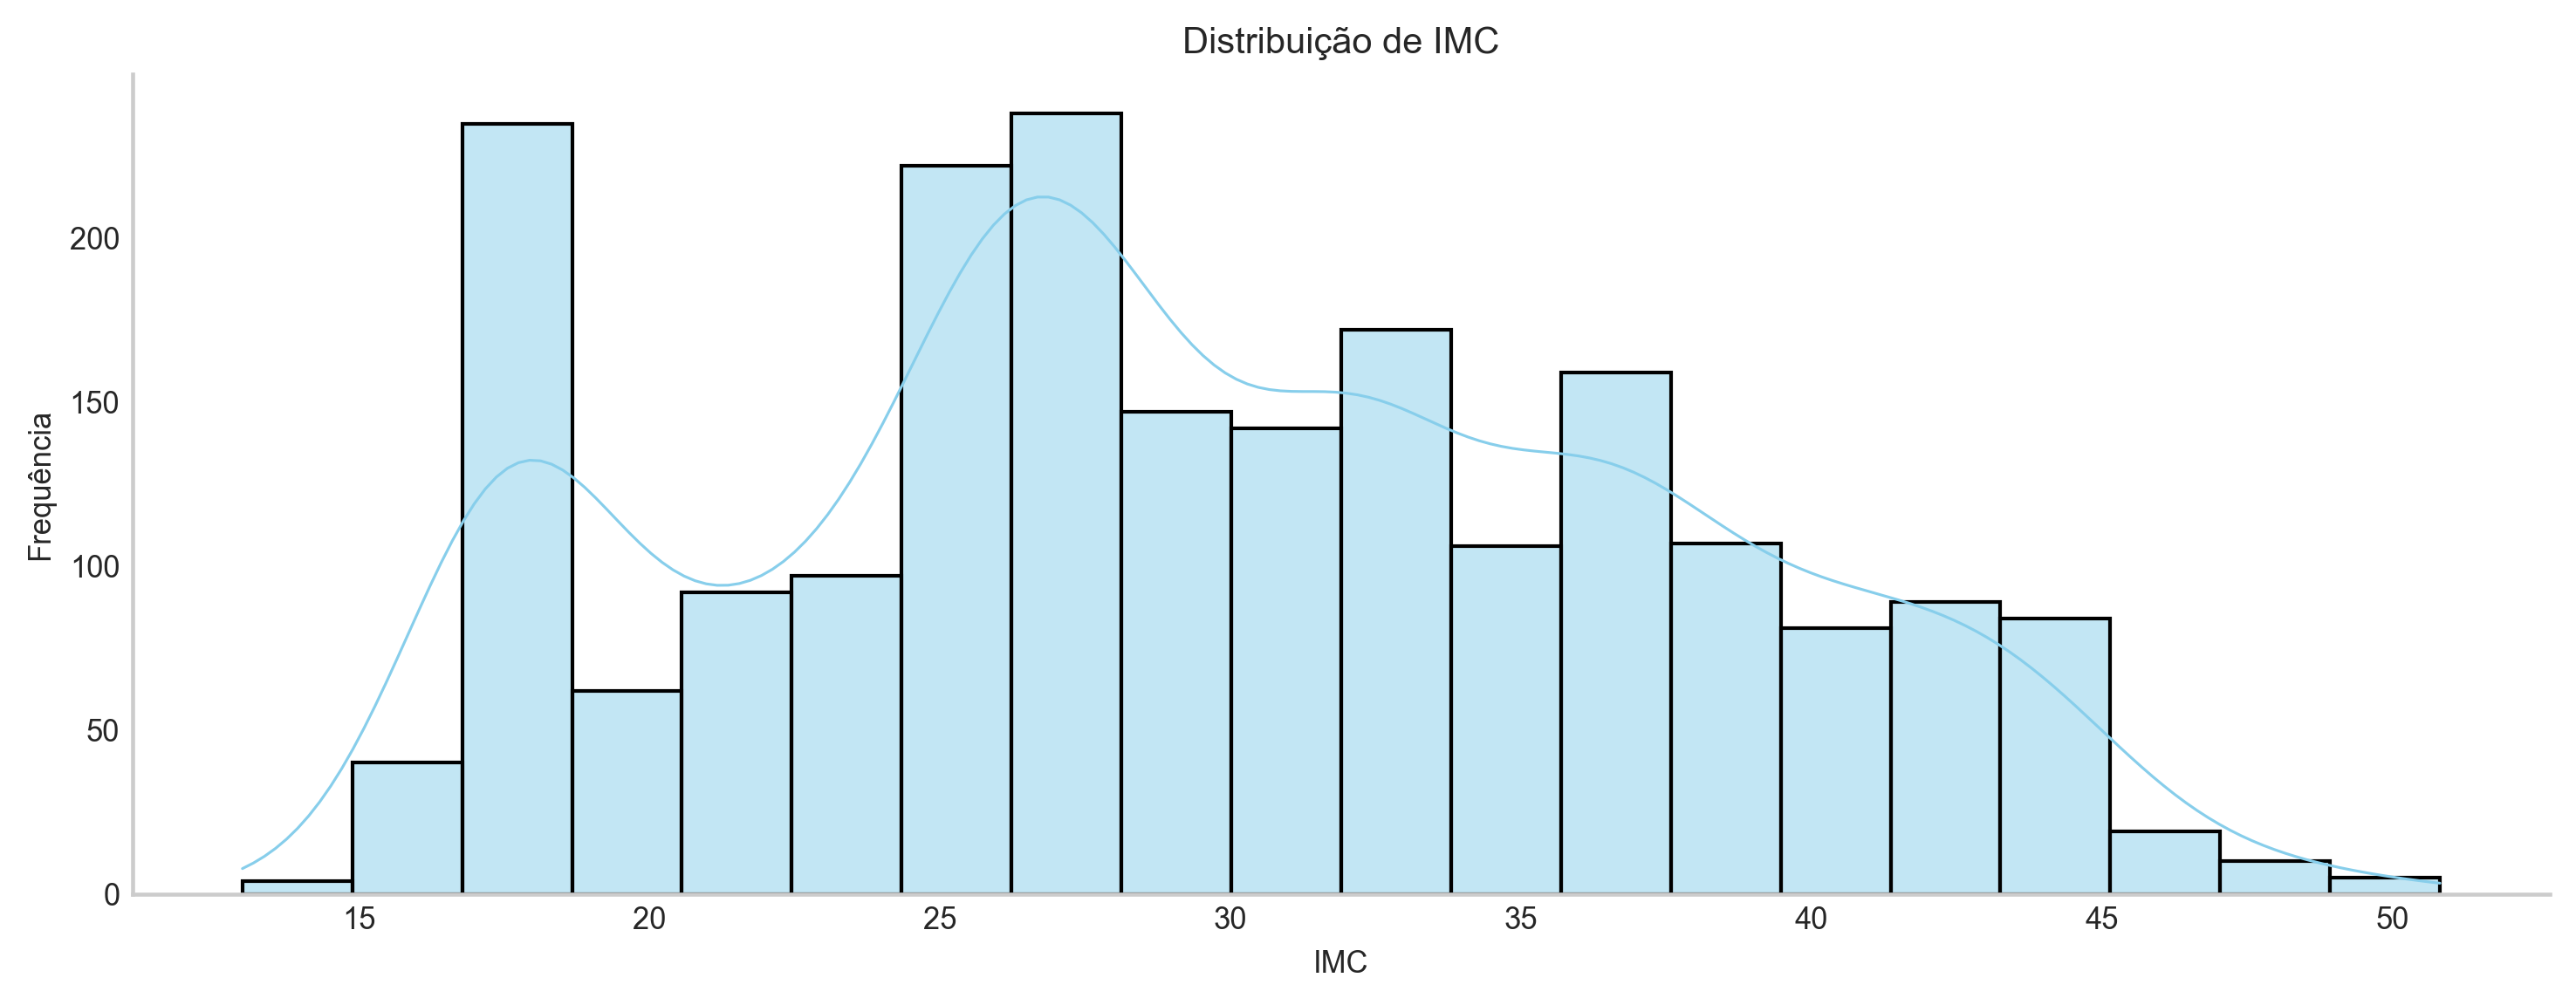

In [14]:
hist_columns_plot = ['FCV', 'NRP', 'CA', 'FAF', 'TUDE', 'IMC']

for idx, etiqueta_serie in enumerate(hist_columns_plot):
    ut.histograma(
        dados=dados_analise[etiqueta_serie],
        grupos=20,
        kde=True,
        size_x=10,
        size_y=4,
        titulo=f"Distribuição de {etiqueta_serie}",
        etiqueta_x=etiqueta_serie,
        etiqueta_y="Frequência",
        color="skyblue",
        edgecolor="black",
    )

### Histogramas juntos

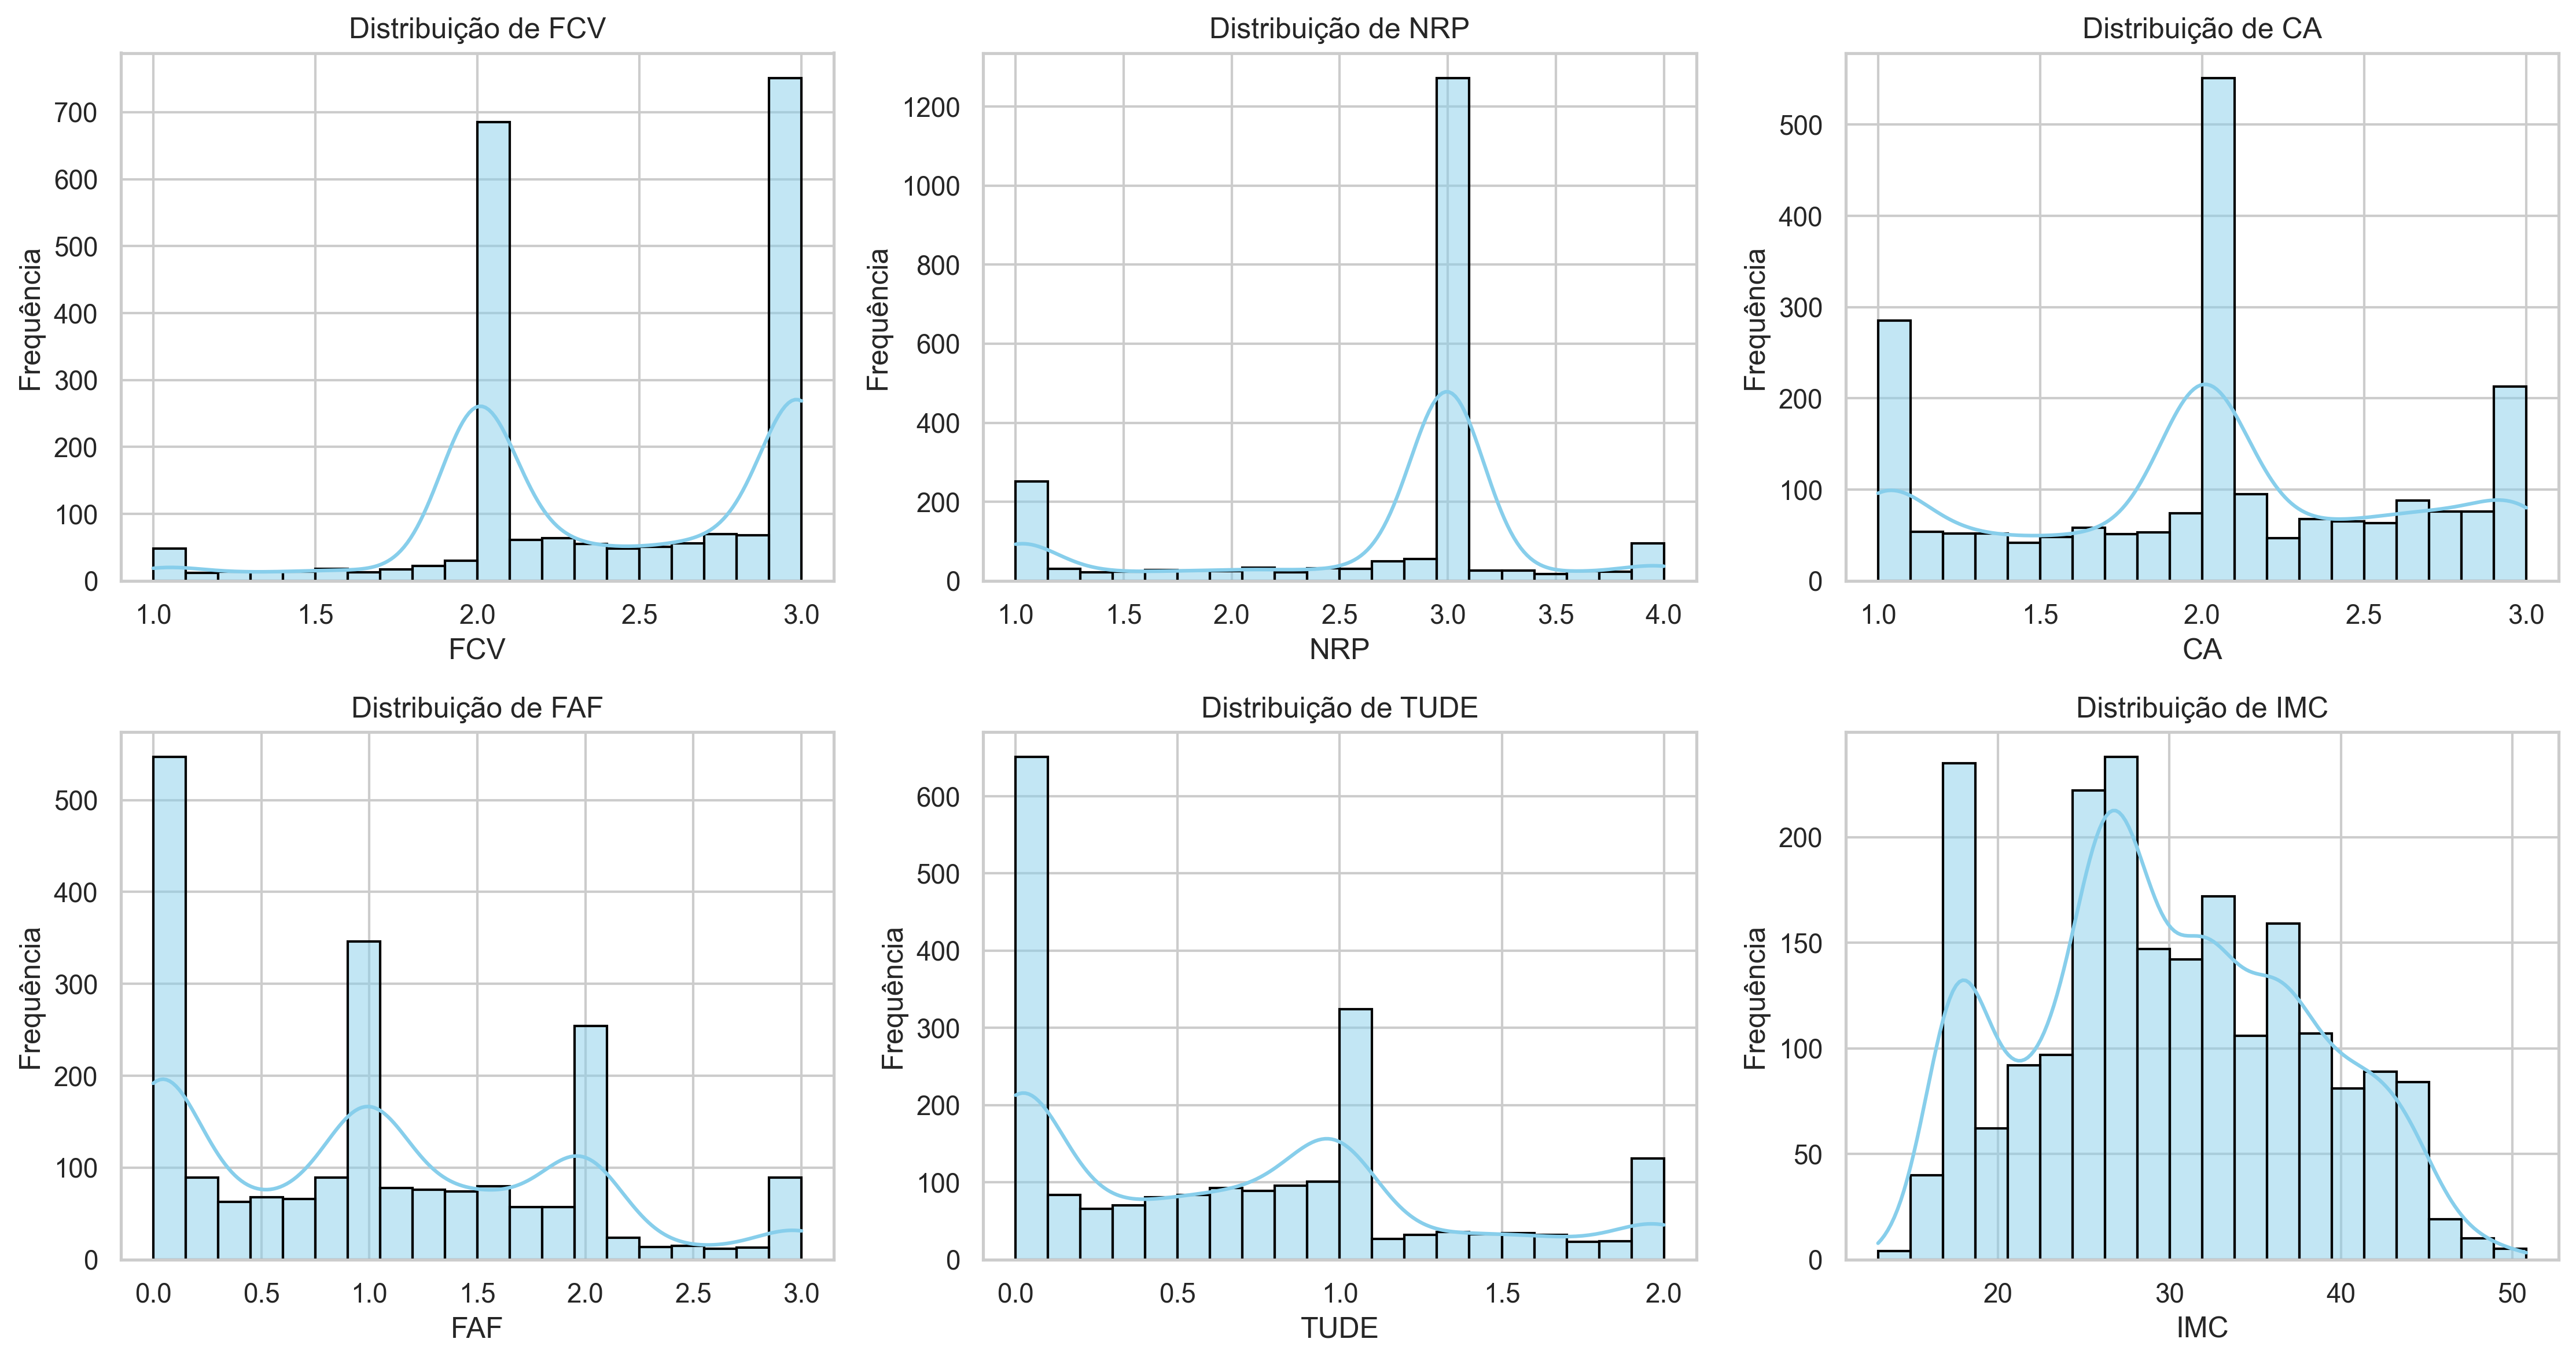

In [15]:
sns.set(style="whitegrid")
columns_plot = ['FCV', 'NRP', 'CA', 'FAF', 'TUDE', 'IMC']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

for idx, column in enumerate(columns_plot):
    row = idx // 3
    col = idx % 3
    sns.histplot(dados_analise[column], bins=20, kde=True, ax=axes[row, col], color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Distribuição de {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequência')
plt.tight_layout()
plt.show()

### Pie Charts

A função ``tarte()`` retorna a ``Fig`` e o ``Axes`` para se poder personalizar mais o gráfico.
É também possível passar parâmetros adicionais (*kwargs*), os quais serão usados na invocação de ``pie()``. 

(<Figure size 1500x1500 with 1 Axes>, <Axes: >)

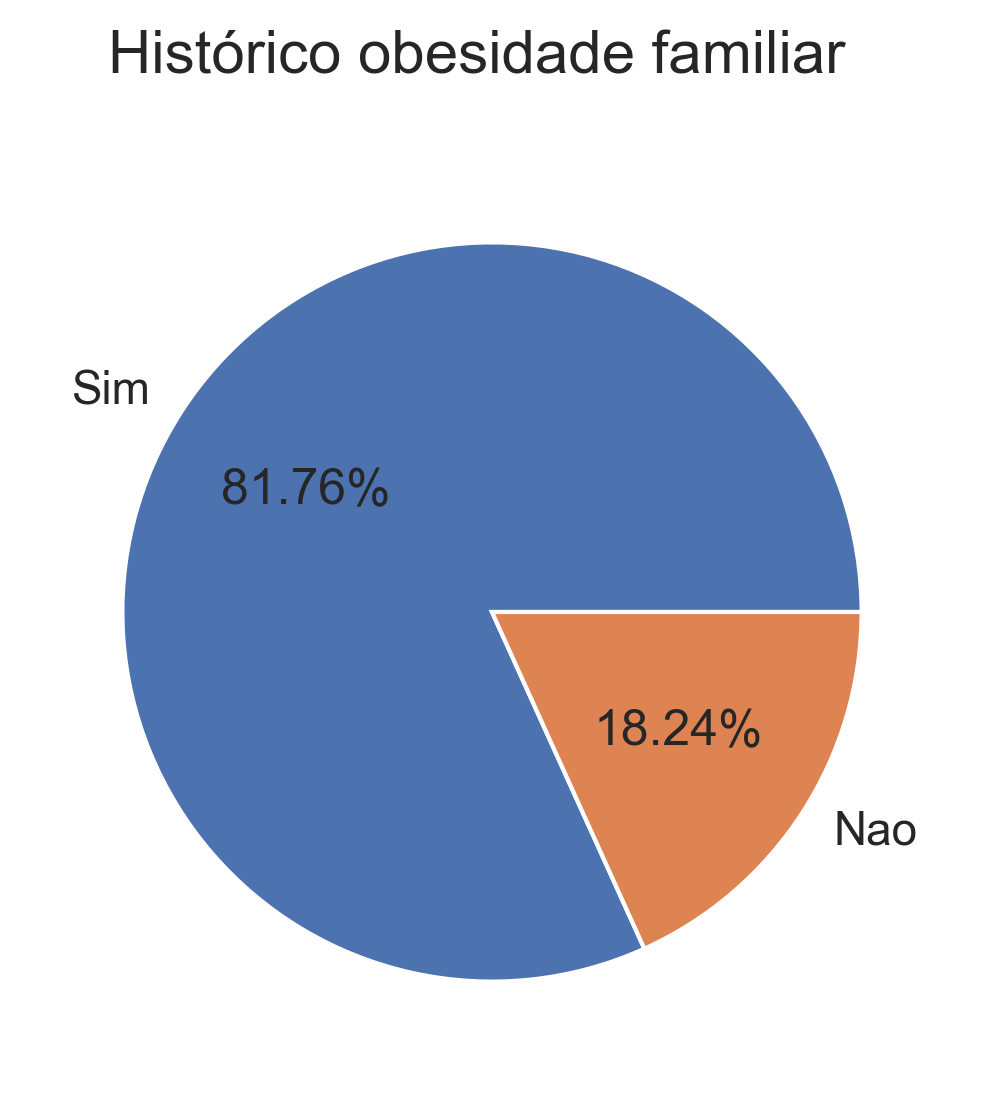

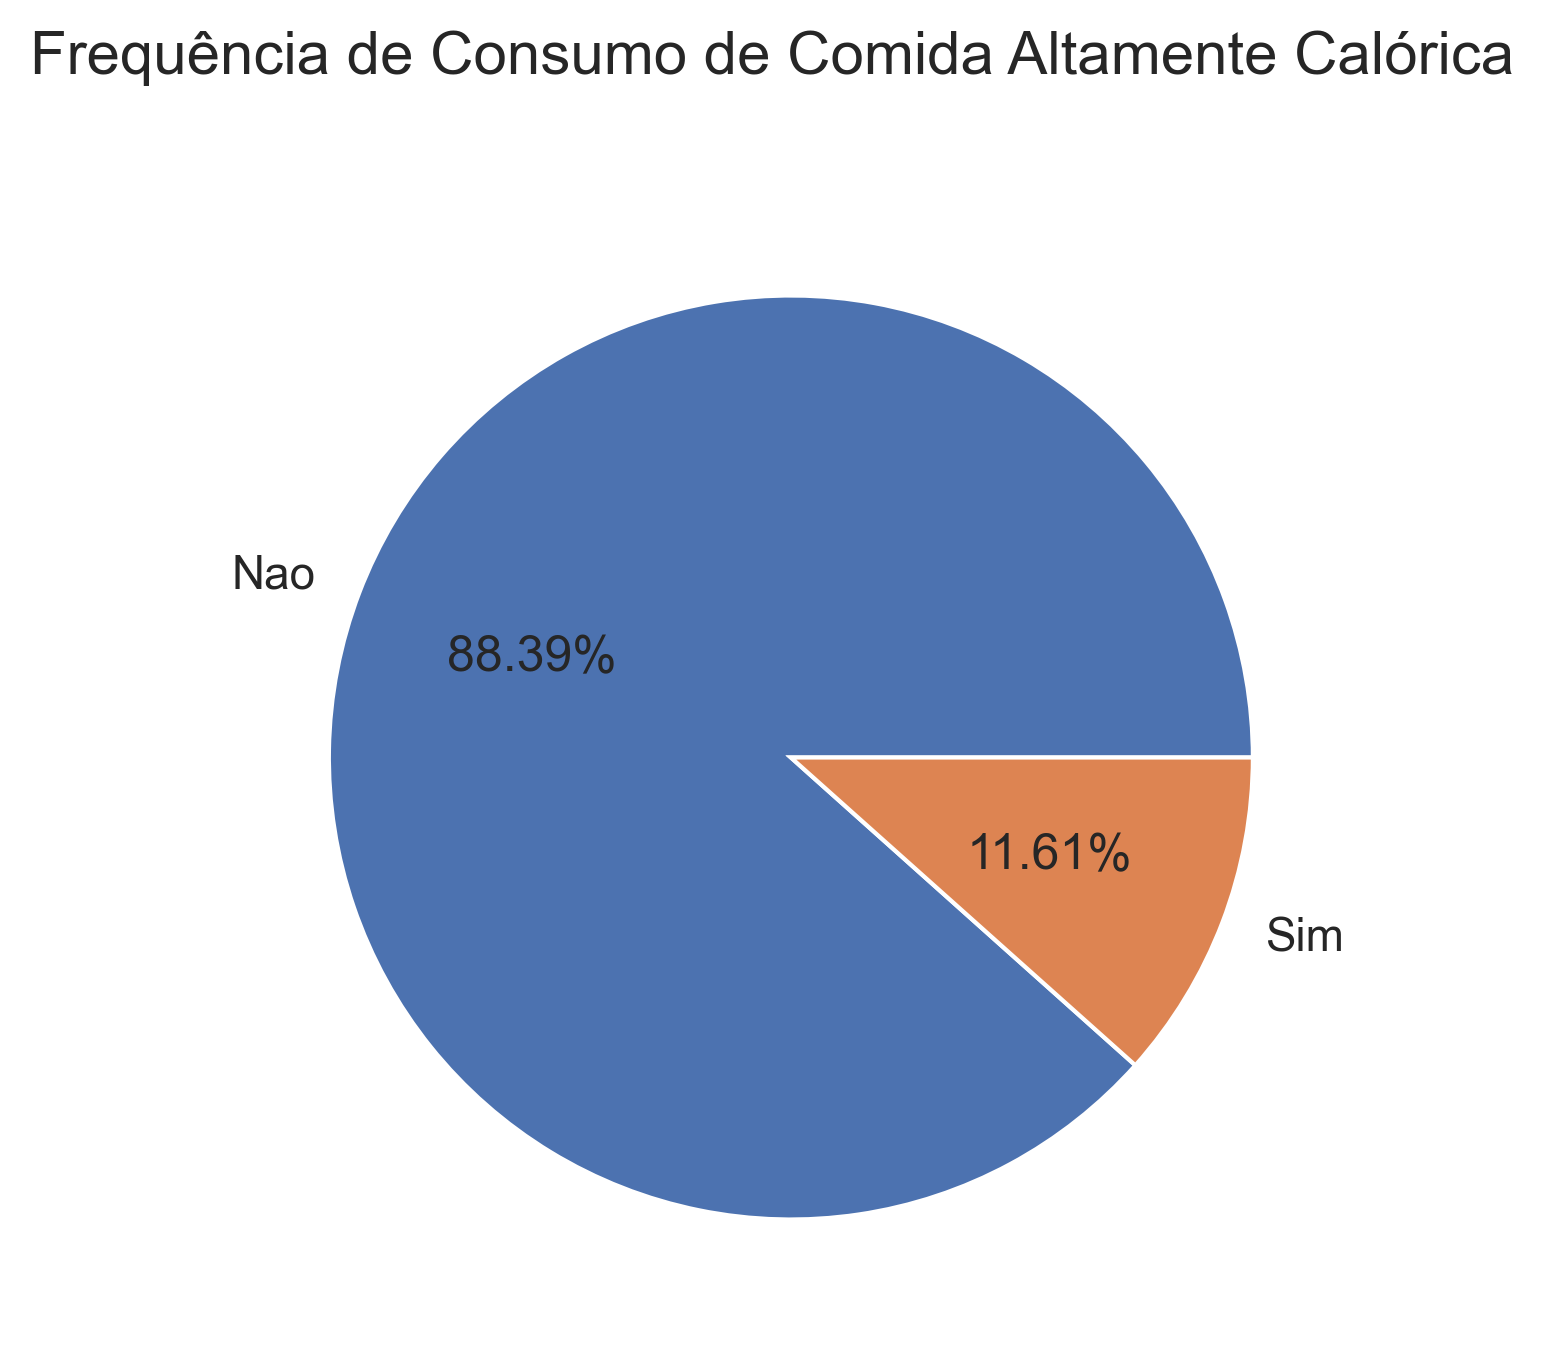

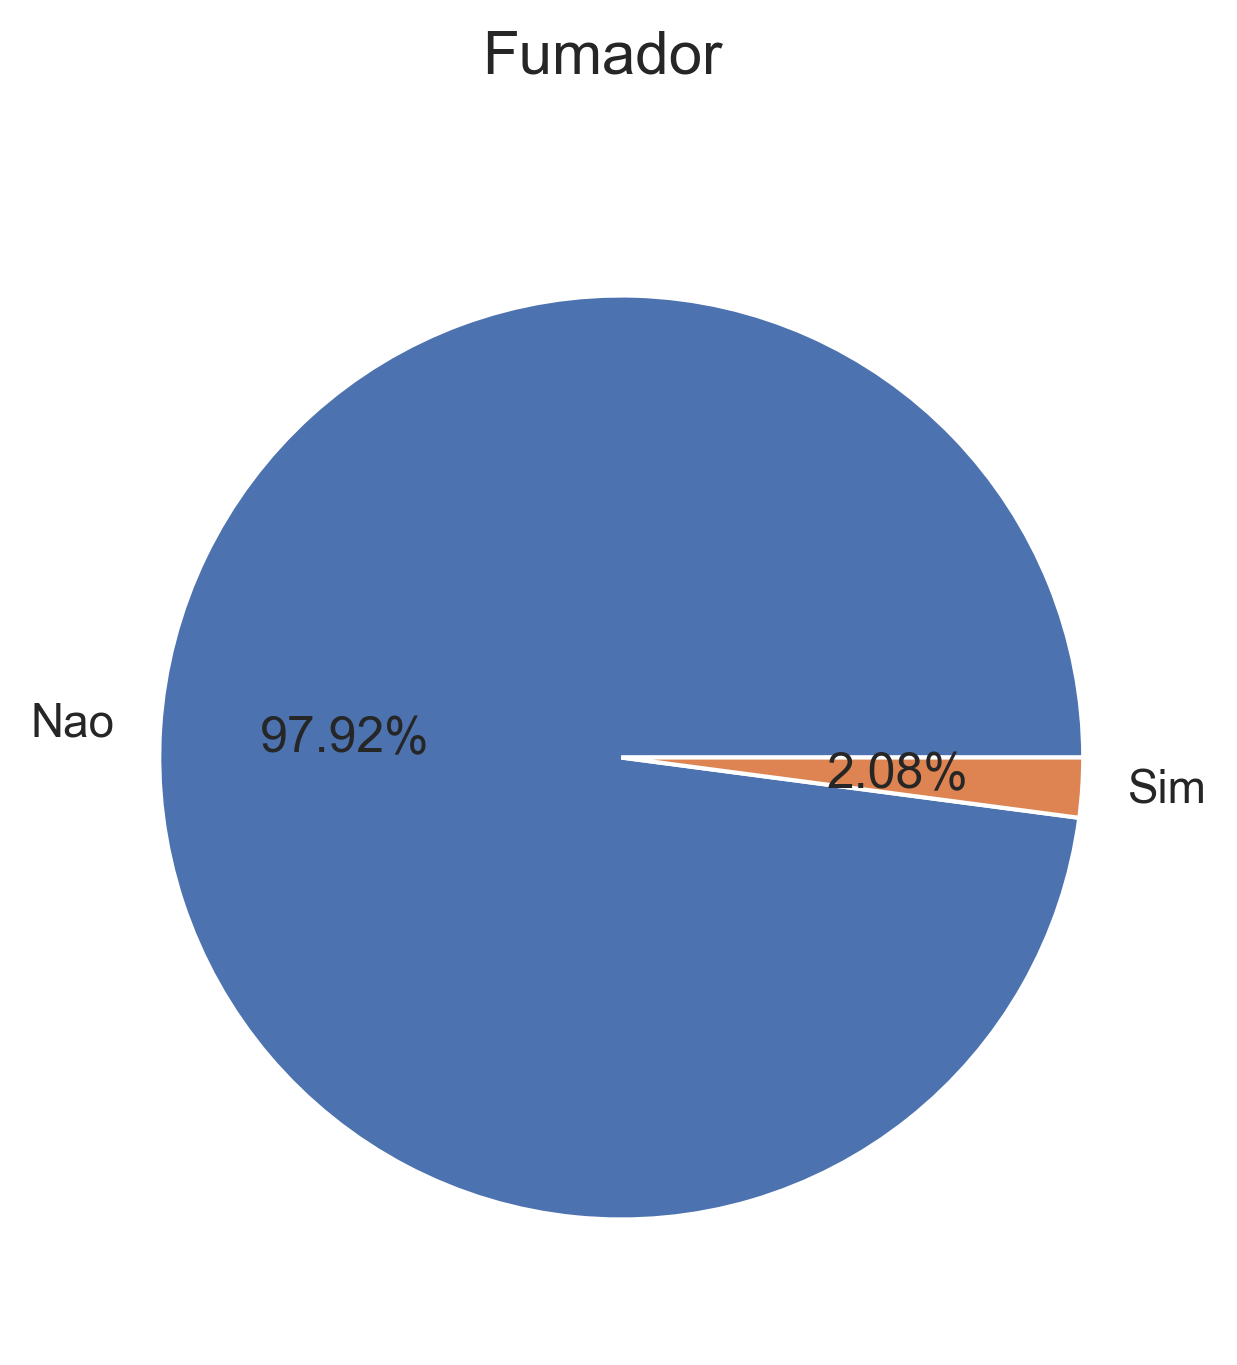

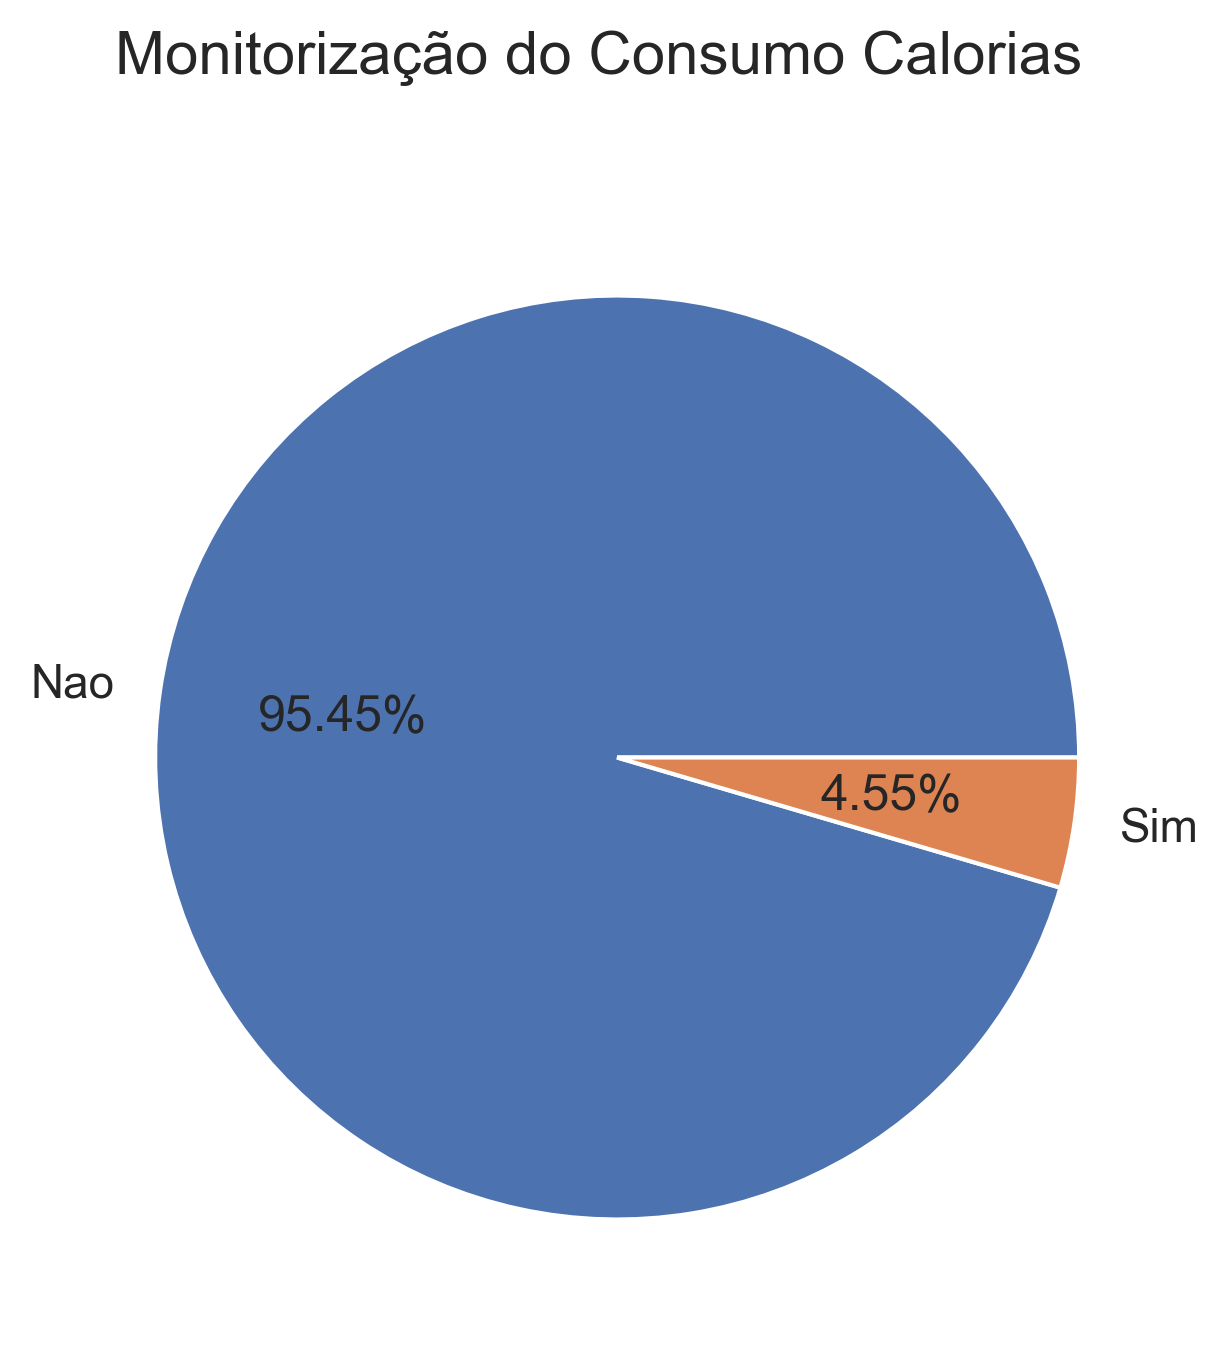

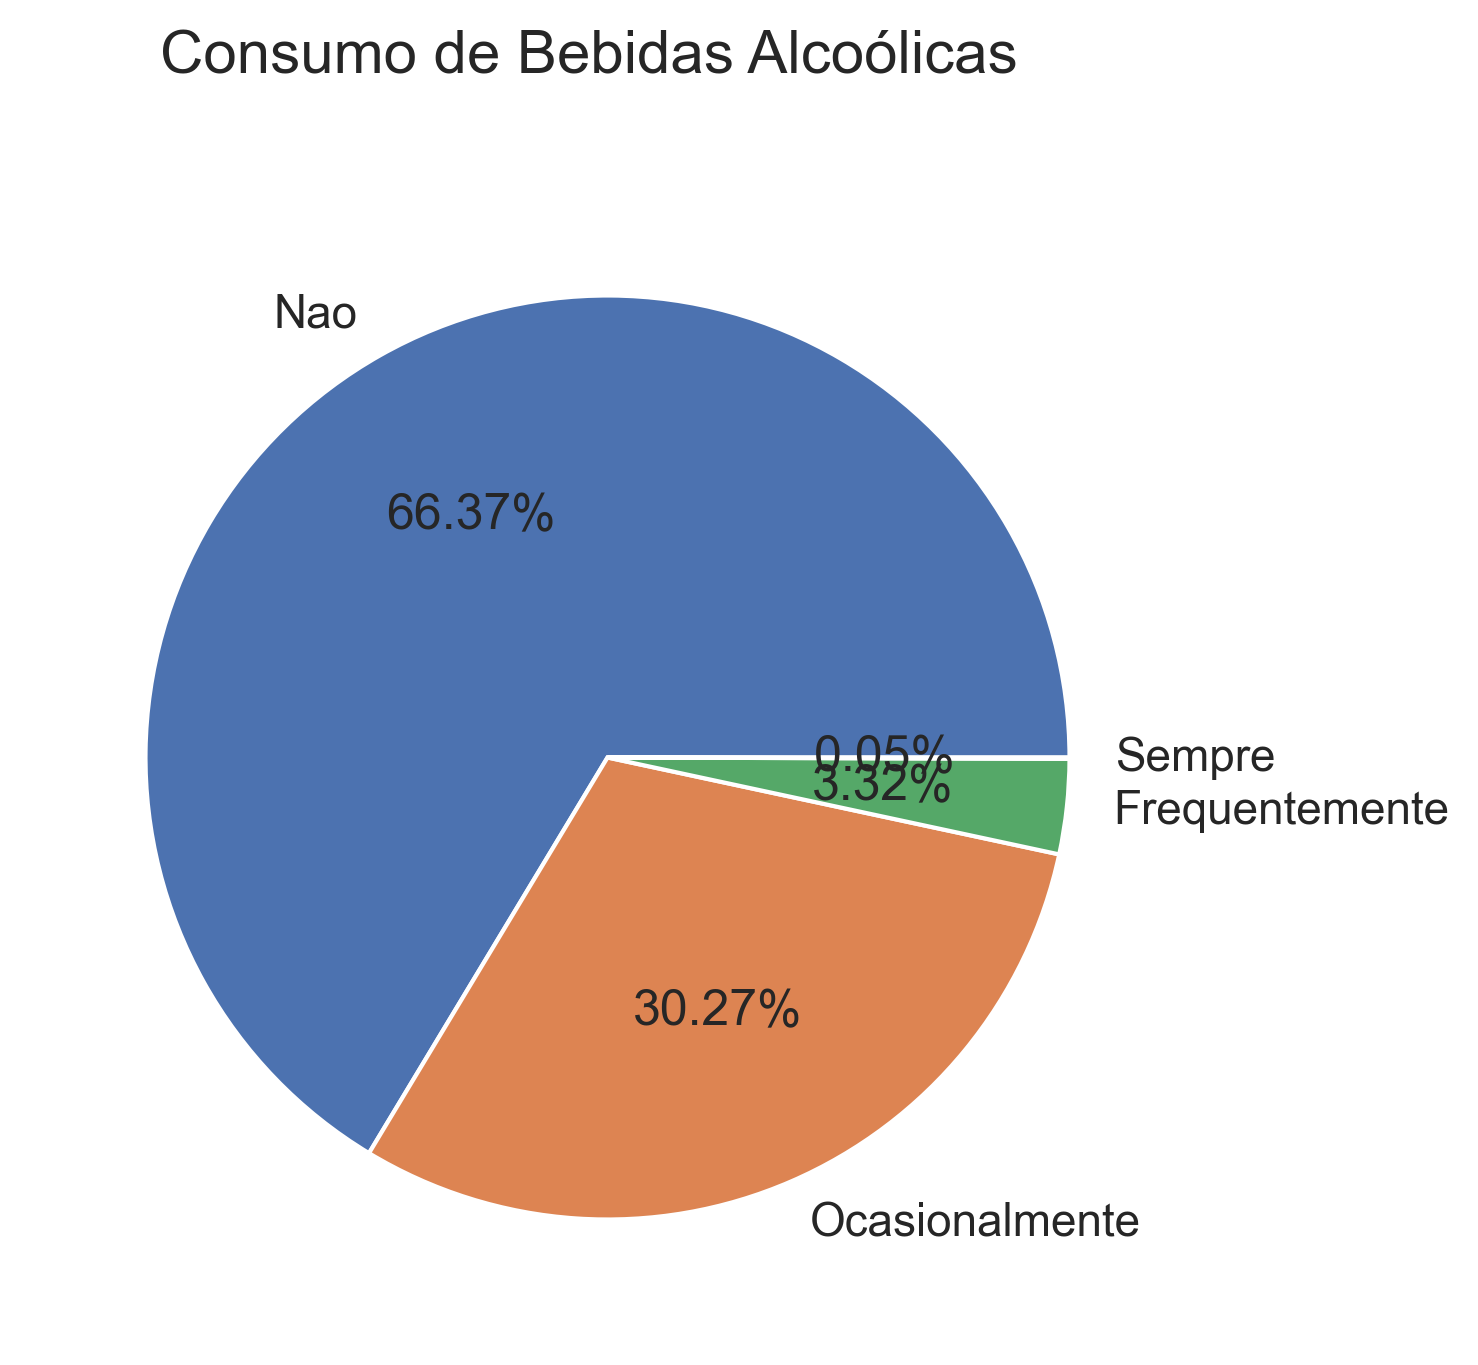

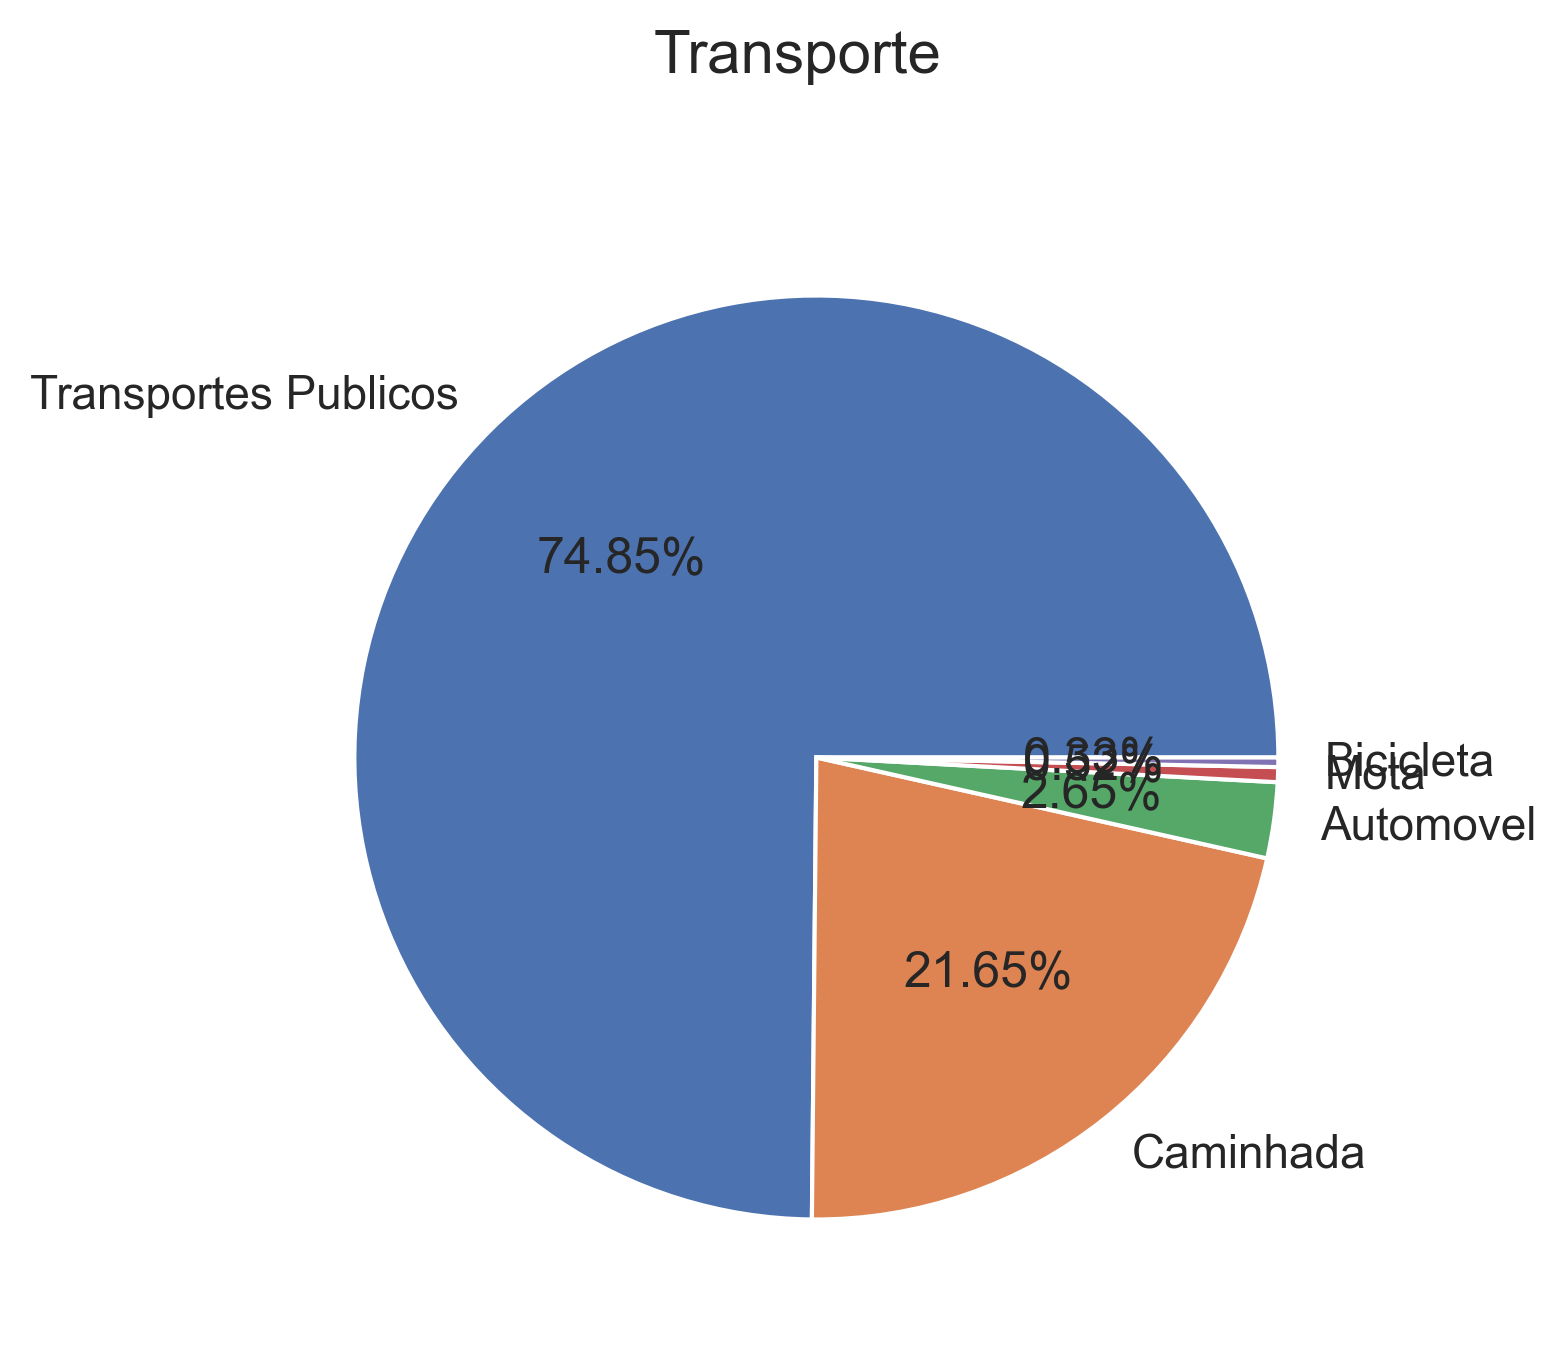

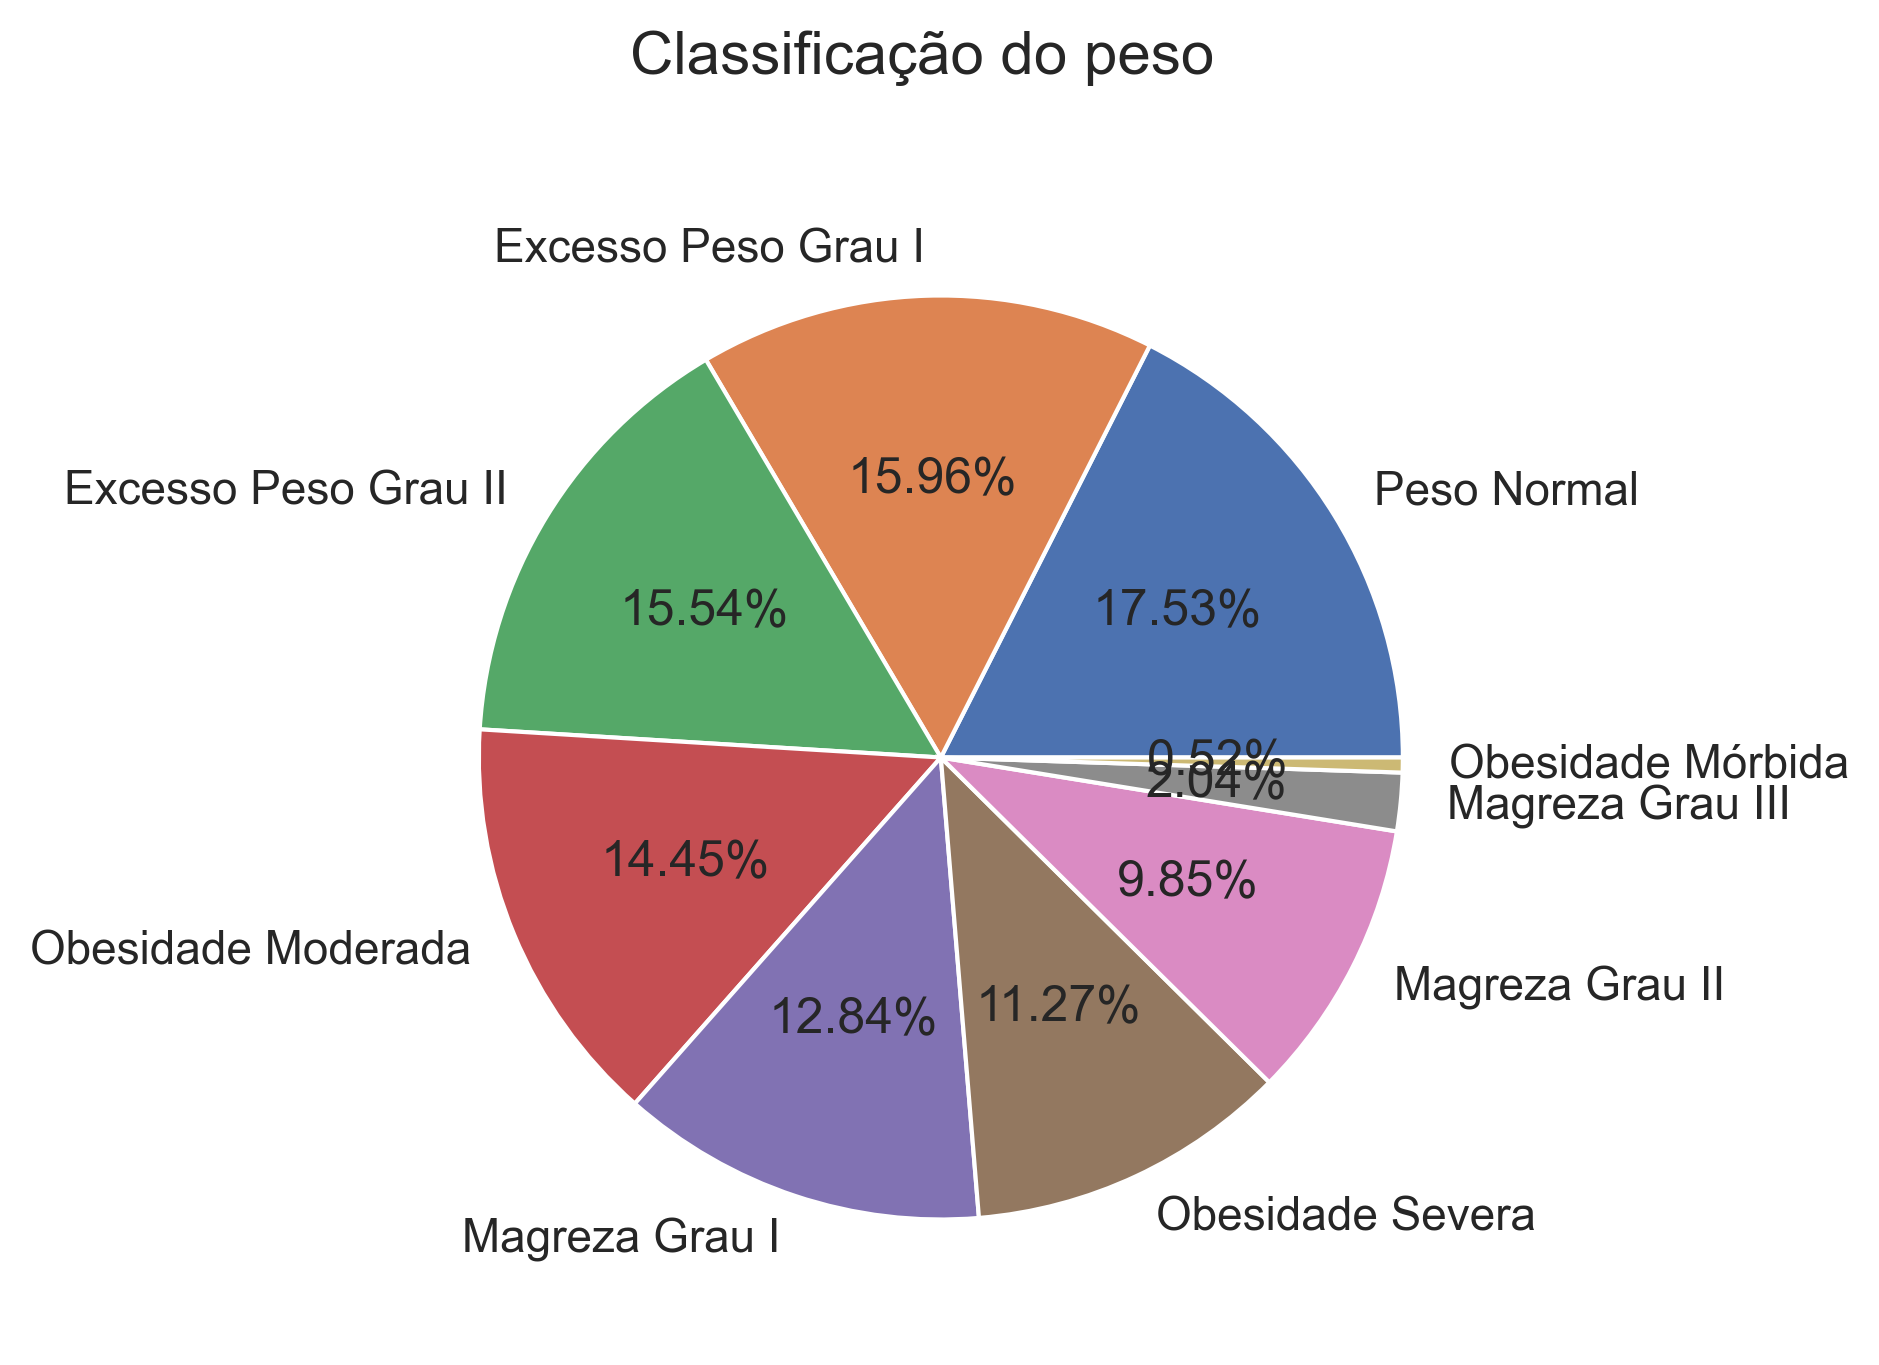

In [16]:
ut.tarte(
    dados=dados_analise["Historico_obesidade_familiar"].value_counts(),
    size_x=4,
    size_y=4,
    titulo="Histórico obesidade familiar",
    labels=dados_lidos["Historico_obesidade_familiar"].unique(),
)

ut.tarte(
    dados=dados_analise["FCCAC"].value_counts(),
    size_x=5,
    size_y=5,
    titulo="Frequência de Consumo de Comida Altamente Calórica",
    labels=dados_lidos["FCCAC"].unique(),
)

ut.tarte(
    dados=dados_analise["Fumador"].value_counts(),
    size_x=5,
    size_y=5,
    titulo="Fumador",
    labels=dados_lidos["Fumador"].unique(),
)

ut.tarte(
    dados=dados_analise["MCC"].value_counts(),
    size_x=5,
    size_y=5,
    titulo="Monitorização do Consumo Calorias",
    labels=dados_lidos["MCC"].unique(),
)

ut.tarte(
    dados=dados_analise["CBA"].value_counts(),
    size_x=5,
    size_y=5,
    titulo="Consumo de Bebidas Alcoólicas",
    labels=dados_lidos["CBA"].unique(),
)

ut.tarte(
    dados=dados_analise["TRANS"].value_counts(),
    size_x=5,
    size_y=5,
    titulo="Transporte",
    labels=[ut.undersplit(texto) for texto in dados_lidos["TRANS"].unique()],
)

ut.tarte(
    dados=dados_analise["Label"].value_counts(),
    size_x=5,
    size_y=5,
    titulo="Classificação do peso",
    labels=[ut.undersplit(texto) for texto in dados_lidos["Label"].unique()],
)

### visualização de outliers

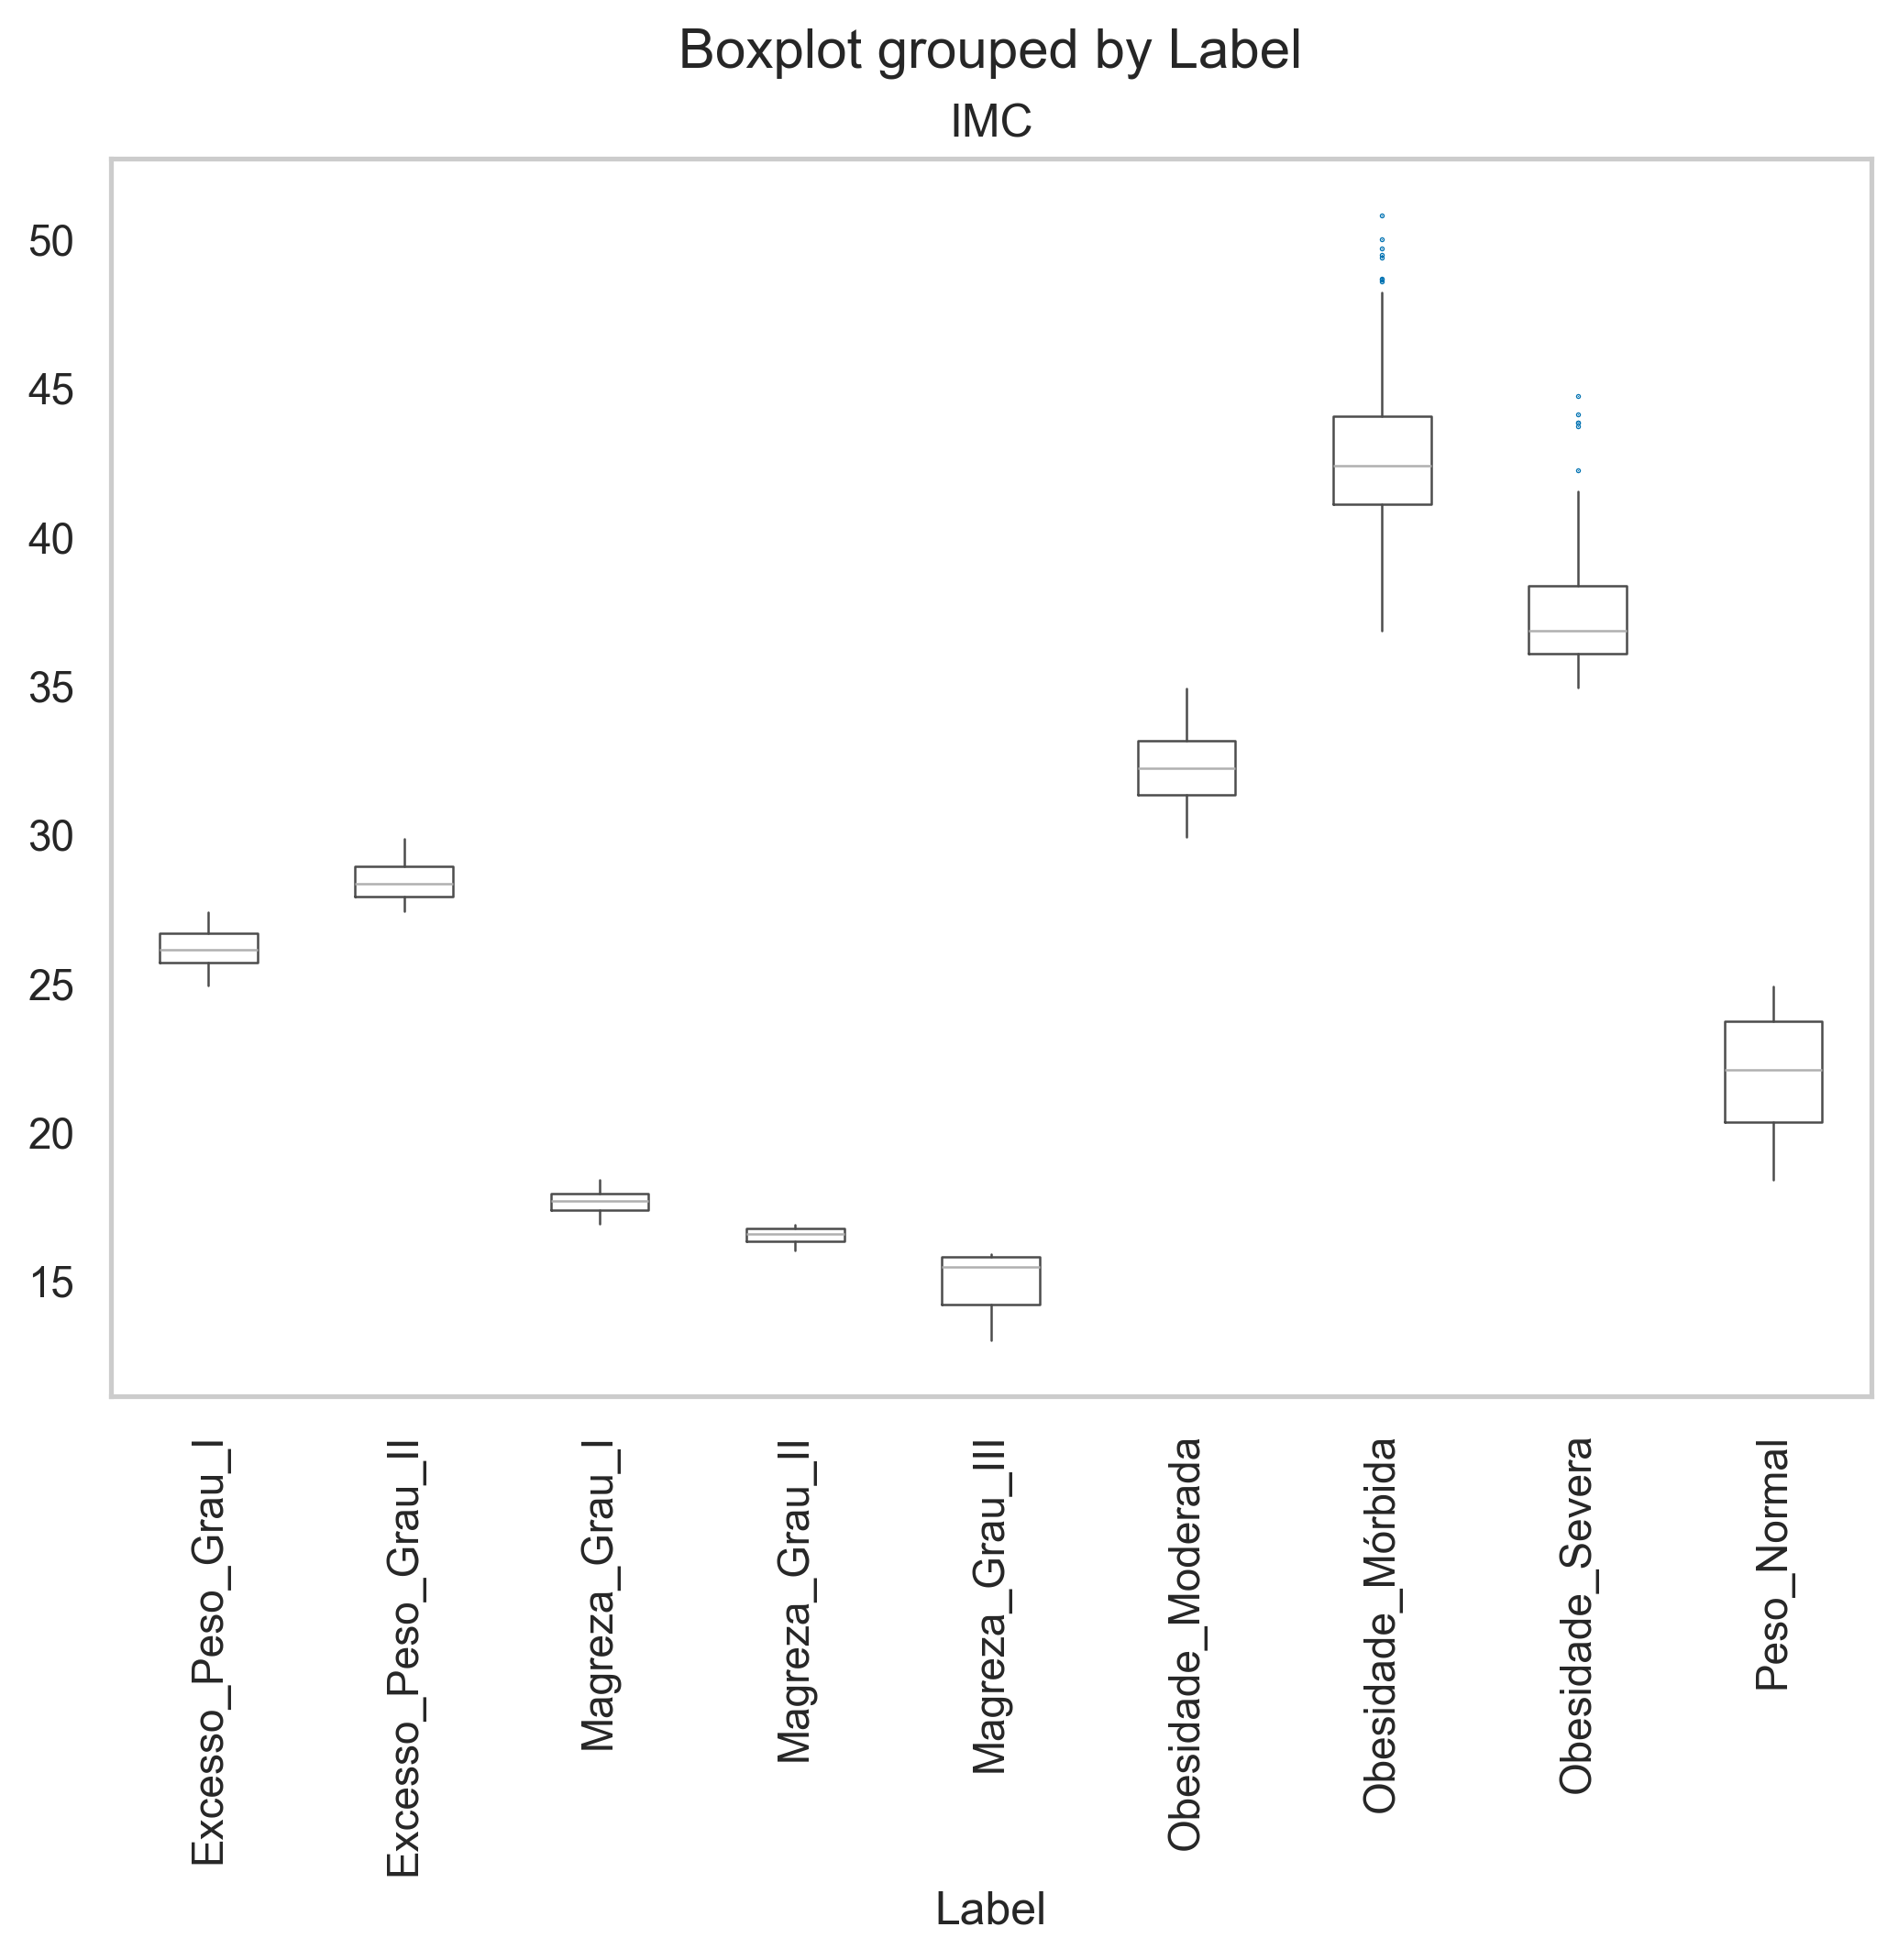

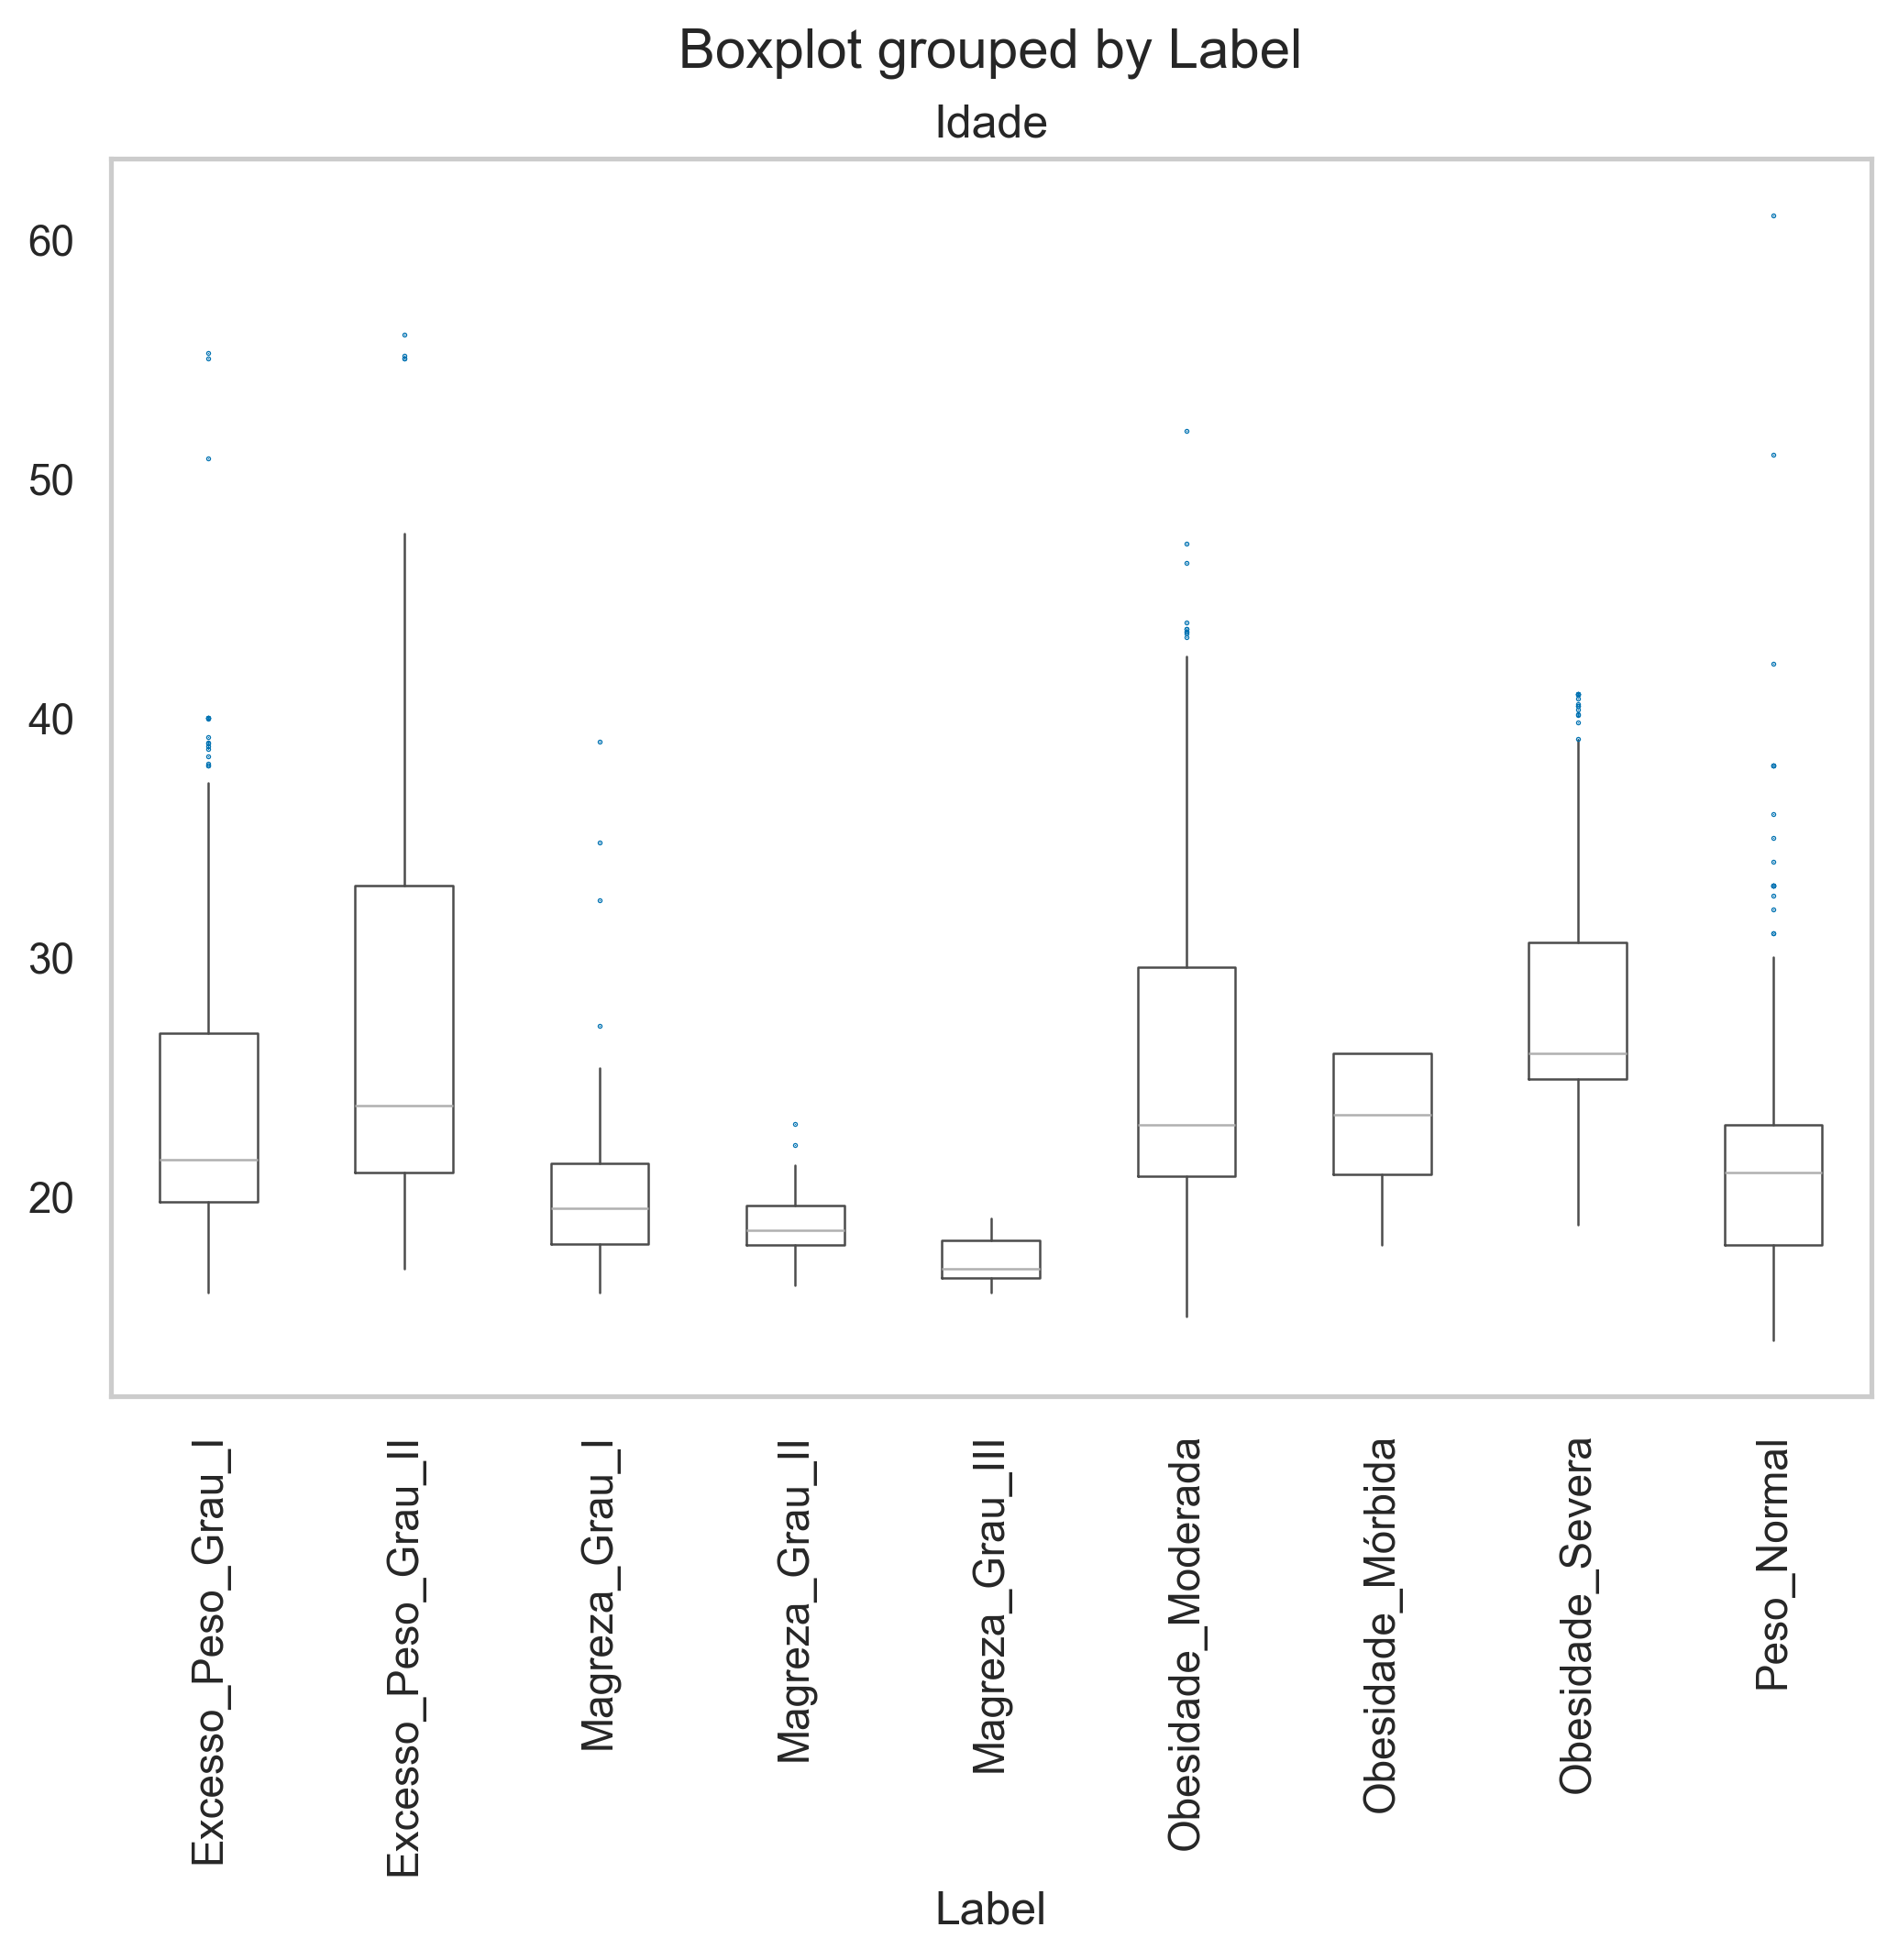

In [17]:
boxplots_colunas = ["IMC", "Idade"]

for coluna in boxplots_colunas:
    if (dados_analise[coluna].dtype != 'object'):
        dados_analise.boxplot(
            column=[coluna],
            by="Label",
            grid=False,
            figsize=(8, 6),
            return_type="dict",
            rot=90,
        )
        plt.title(coluna)

plt.show()

### Pairplots

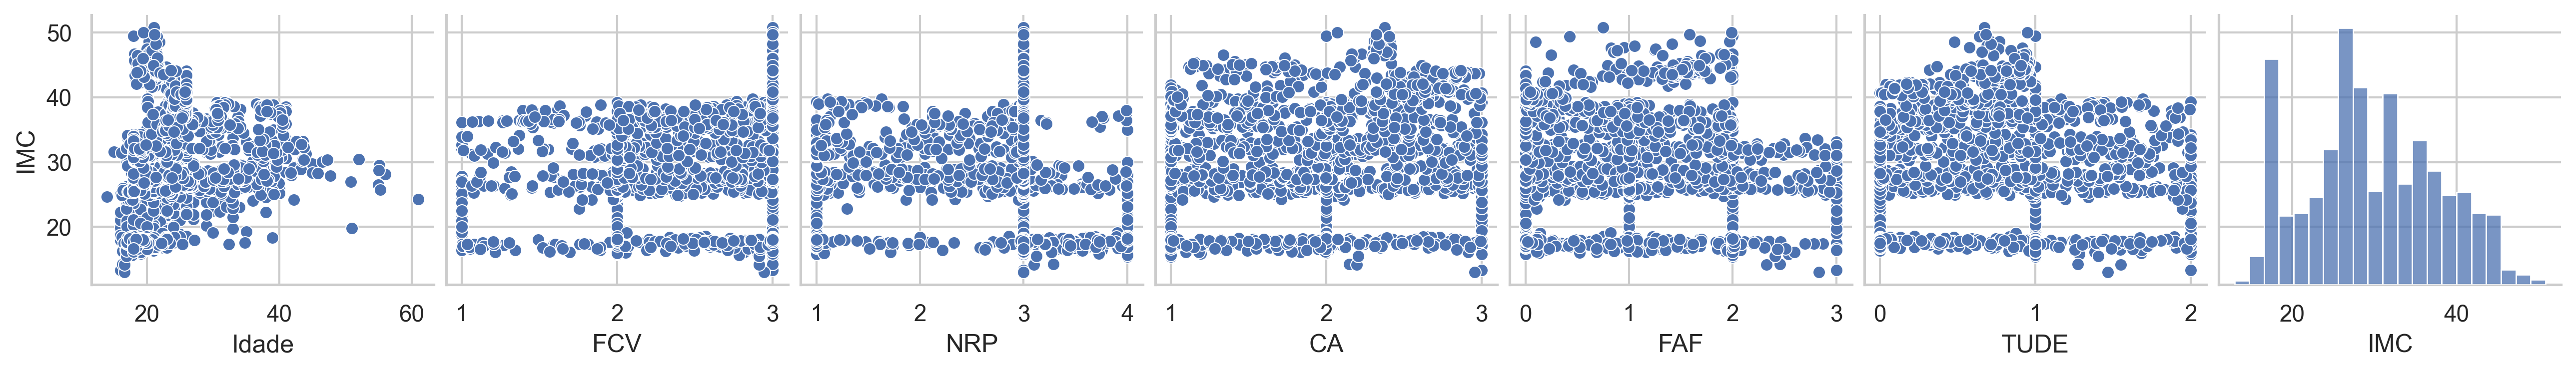

In [18]:
sns.pairplot(data=dados_analise, x_vars=colunas_numericas, y_vars="IMC")

## 4.1.4

### a) Identificação de valores nulos e NAN e "limpar" o dataset.

Verificar se existem valores nulos.

In [19]:
dados_analise[dados_analise.isnull().any(axis=1)]

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC


Uma forma alternativa é

In [20]:
dados_analise.isnull().sum()

Genero                          0
Idade                           0
Historico_obesidade_familiar    0
FCCAC                           0
FCV                             0
NRP                             0
CCER                            0
Fumador                         0
CA                              0
MCC                             0
FAF                             0
TUDE                            0
CBA                             0
TRANS                           0
Label                           0
IMC                             0
dtype: int64

Verificar se existem valores NaN

In [21]:
dados_analise[dados_analise.isna().any(axis=1)]

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC


In [23]:
dados_analise.nunique()

Genero                             2
Idade                           1402
Historico_obesidade_familiar       2
FCCAC                              2
FCV                              810
NRP                              635
CCER                               4
Fumador                            2
CA                              1268
MCC                                2
FAF                             1190
TUDE                            1129
CBA                                4
TRANS                              5
Label                              9
IMC                             1968
dtype: int64

### Notas sobre o pré-processamento dos dados

Não foram encontrados valores nulos, nem valor **NaN**, não sendo por isso necessário fazer tratamento adicionais ao dados neste contexto. 

Algum do trabalho de limpeza foi realizado no ponto *4.1.2*. 


### Guardar o DataFrame em ficheiro para uso posterior

In [22]:
dados_analise.to_csv(ficheiro_preparado, index=False)
print(f"Ficheiro '{ficheiro_preparado}' gravado.")

Ficheiro 'dados_preparados.csv' gravado.
